In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.data_access.utilities as utilities
from visual_behavior.data_access import loading as loading

import visual_behavior.visualization.utils as utils
import visual_behavior.visualization.ophys.platform_paper_figures as ppf

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

In [4]:
import figrid as fg
import figrid.example_figures as example_figures

### load experiments table

In [5]:
cache_dir = loading.get_platform_analysis_cache_dir()
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
# experiments_table = cache.get_ophys_experiments()
# print(cache_dir)

In [52]:
experiments_table = loading.get_platform_paper_experiment_table()
print(len(experiments_table))

1249


In [7]:
cells_table = loading.get_cell_table()
print(len(cells_table.cell_specimen_id.unique()))

28833


### get useful info

In [8]:
experience_levels = np.sort(experiments_table.experience_level.unique())
cell_types = np.sort(experiments_table.cell_type.unique())[::-1]
palette = utilities.get_experience_level_colors()

In [9]:
save_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_plots\figure_2'

folder = 'population_averages'

### load multi_session_mean_df

In [55]:
data_type = 'events'

interpolate = True
output_sampling_rate = 30

# set inclusion criteria
# options: ['active_only', 'closest_familiar_and_novel', 'containers_with_all_levels']
inclusion_criteria = 'platform_experiment_table'

### change response multi_session_df

In [11]:
# params for stim response df creation
event_type = 'all'

# params for mean response df creation
conditions = ['cell_specimen_id', 'is_change']


change_suffix = '_'+utils.get_conditions_string(data_type, conditions)+'_'+inclusion_criteria

change_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria, 
                                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate, 
                                                         epoch_duration_mins=None)

change_mdf = change_mdf[change_mdf.is_change==True]

there are 1249 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limiting to platform experiments
there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


### pre-change response multi_session_df

In [12]:
# params for stim response df creation
event_type = 'all'

# params for mean response df creation
conditions = ['cell_specimen_id', 'pre_change']


pre_change_suffix = '_'+utils.get_conditions_string(data_type, conditions)+'_'+inclusion_criteria

pre_change_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria, 
                                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate, 
                                                         epoch_duration_mins=None)

pre_change_mdf = pre_change_mdf[pre_change_mdf.pre_change==True]

there are 1249 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limiting to platform experiments
there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


### omission response multi_session_df

In [13]:
# params for stim response df creation
event_type = 'all'

# params for mean response df creation
conditions = ['cell_specimen_id', 'omitted']


omission_suffix = '_'+utils.get_conditions_string(data_type, conditions)+'_'+inclusion_criteria

omission_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria, 
                                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate, 
                                                         epoch_duration_mins=None)

omission_mdf = omission_mdf[omission_mdf.omitted==True]

there are 1249 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limiting to platform experiments
there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table



### population averages

### changes

array([<AxesSubplot:title={'center':'Familiar'}, ylabel='population\nresponse'>,
       <AxesSubplot:title={'center':'Novel 1'}>,
       <AxesSubplot:title={'center':'Novel >1'}>,
       <AxesSubplot:ylabel='population\nresponse'>, <AxesSubplot:>,
       <AxesSubplot:>,
       <AxesSubplot:xlabel='time relative to change\n(seconds)', ylabel='population\nresponse'>,
       <AxesSubplot:xlabel='time relative to change\n(seconds)'>,
       <AxesSubplot:xlabel='time relative to change\n(seconds)'>],
      dtype=object)

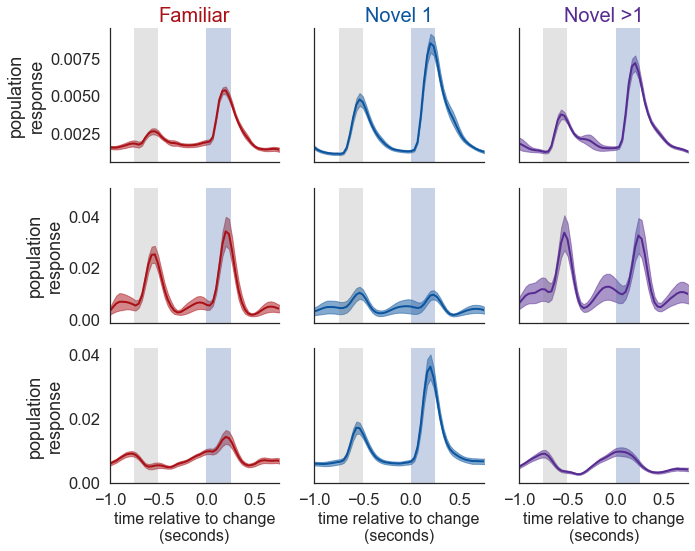

In [14]:
df = change_mdf.copy()

ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to change\n(seconds)', interval_sec=0.5,
                                                              data_type=data_type, event_type='changes', suffix=change_suffix,
                                                              save_dir=save_dir, folder=folder, ax=None)

### each project code 

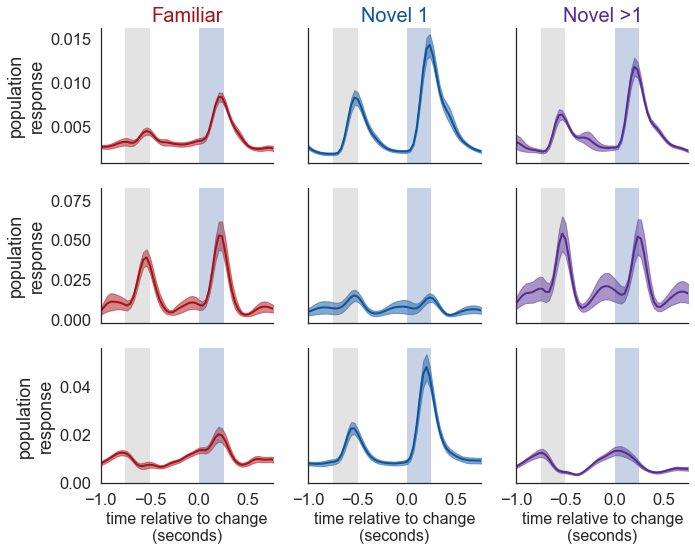

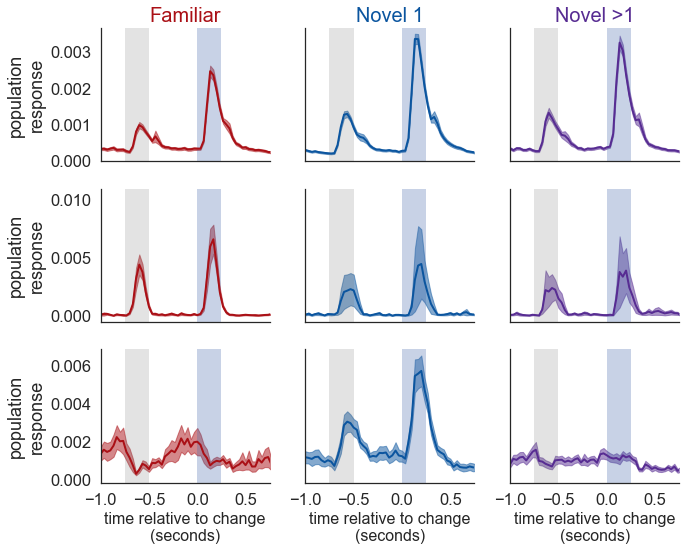

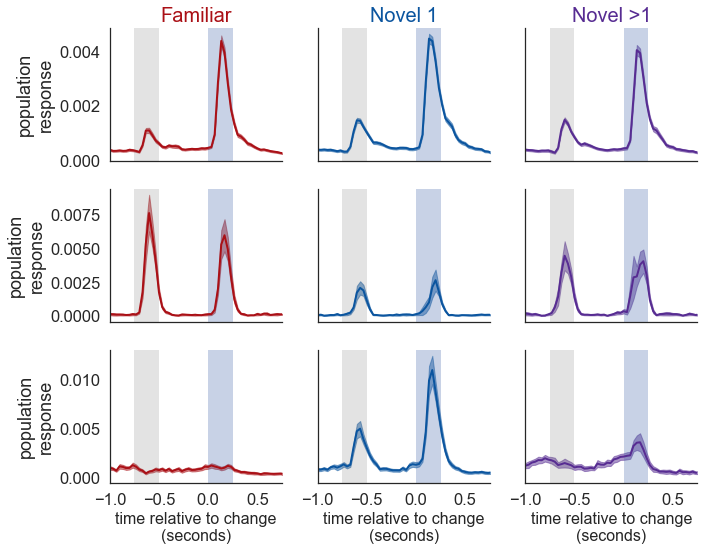

In [15]:
for project_code in change_mdf.project_code.unique():
    
    df = change_mdf[change_mdf.project_code==project_code]

    ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to change\n(seconds)', interval_sec=0.5,
                                                                  data_type=data_type, event_type='changes',
                                                                  suffix=change_suffix+'_'+project_code,
                                                                  save_dir=save_dir, folder=folder, ax=None)

### omissions

array([<AxesSubplot:title={'center':'Familiar'}, ylabel='population\nresponse'>,
       <AxesSubplot:title={'center':'Novel 1'}>,
       <AxesSubplot:title={'center':'Novel >1'}>,
       <AxesSubplot:ylabel='population\nresponse'>, <AxesSubplot:>,
       <AxesSubplot:>,
       <AxesSubplot:xlabel='time relative to omission\n(seconds)', ylabel='population\nresponse'>,
       <AxesSubplot:xlabel='time relative to omission\n(seconds)'>,
       <AxesSubplot:xlabel='time relative to omission\n(seconds)'>],
      dtype=object)

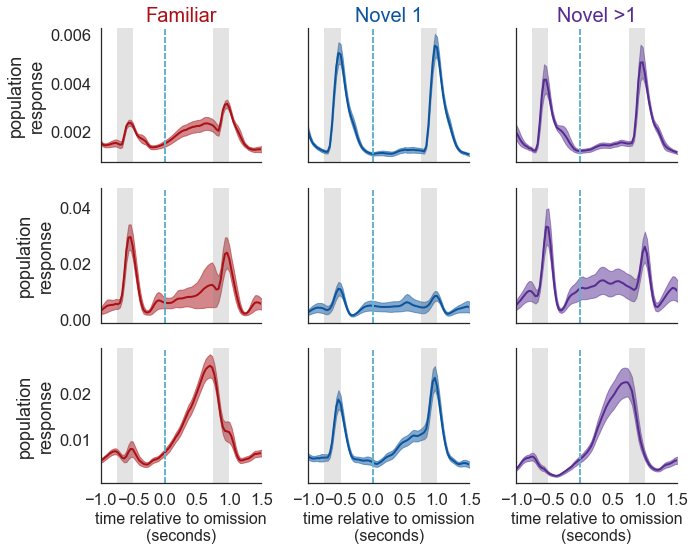

In [16]:
df = omission_mdf.copy()

ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1., 1.5], xlabel='time relative to omission\n(seconds)', interval_sec=0.5,
                                                              data_type=data_type, event_type='omissions', suffix=omission_suffix,
                                                              save_dir=save_dir, folder=folder, ax=None)

### each project code 

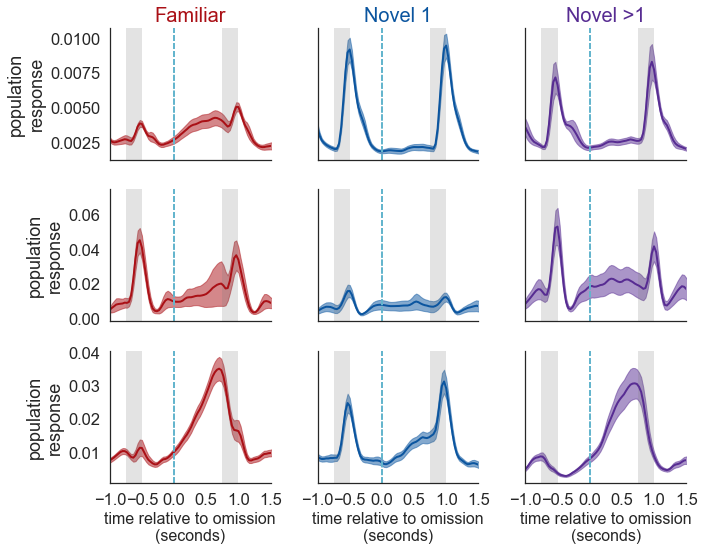

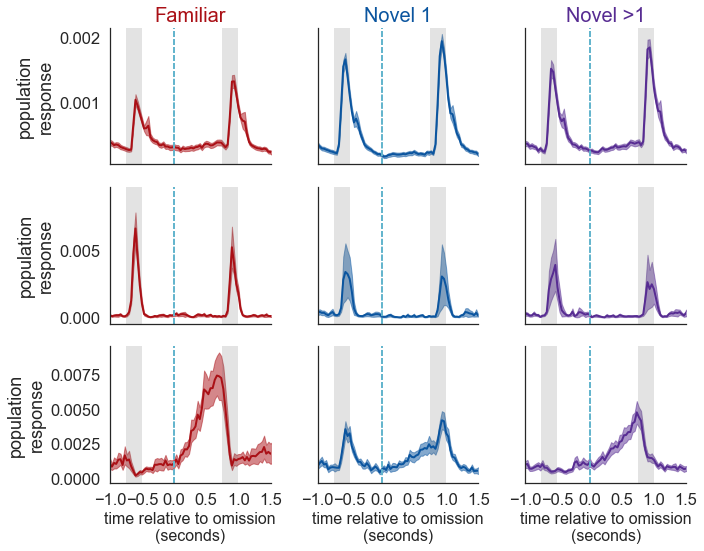

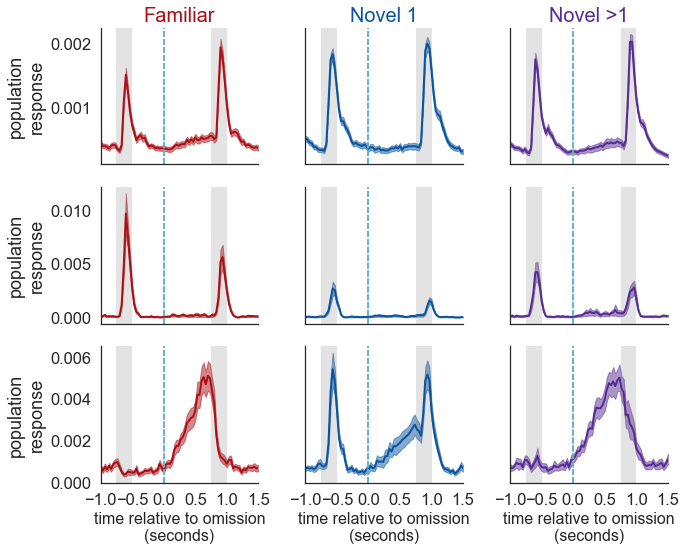

In [17]:
for project_code in omission_mdf.project_code.unique():
    
    df = omission_mdf[omission_mdf.project_code==project_code]
    
    ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1., 1.5], xlabel='time relative to omission\n(seconds)', interval_sec=0.5,
                                                              data_type=data_type, event_type='omissions', 
                                                              suffix=omission_suffix+'_'+project_code,
                                                              save_dir=save_dir, folder=folder, ax=None)

### fraction responsive cells

### changes

array([<AxesSubplot:title={'center':'Excitatory'}, ylabel='fraction\nresponsive'>,
       <AxesSubplot:title={'center':'Sst Inhibitory'}, ylabel='fraction\nresponsive'>,
       <AxesSubplot:title={'center':'Vip Inhibitory'}, ylabel='fraction\nresponsive'>],
      dtype=object)

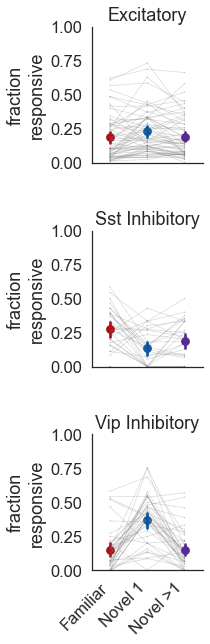

In [18]:
ppf.plot_fraction_responsive_cells(change_mdf, responsiveness_threshold=0.1, ylim=(0,1),
                                    save_dir=save_dir, folder=folder, suffix=change_suffix, horizontal=False, ax=None)

### omissions

array([<AxesSubplot:title={'center':'Excitatory'}, ylabel='fraction\nresponsive'>,
       <AxesSubplot:title={'center':'Sst Inhibitory'}, ylabel='fraction\nresponsive'>,
       <AxesSubplot:title={'center':'Vip Inhibitory'}, ylabel='fraction\nresponsive'>],
      dtype=object)

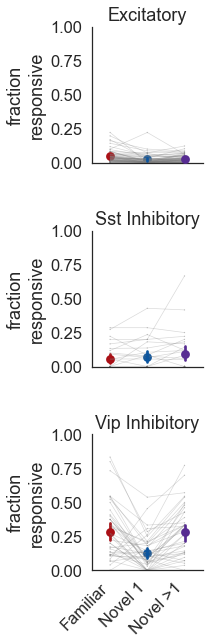

In [19]:
ppf.plot_fraction_responsive_cells(omission_mdf, responsiveness_threshold=0.1, ylim=(0,1),
                                    save_dir=save_dir, folder=folder, suffix=omission_suffix, horizontal=False, ax=None)

## metrics disributions

### get cell metrics table for changes

In [20]:
import visual_behavior.ophys.response_analysis.cell_metrics as cm


In [61]:
ophys_experiment_ids = experiments_table.index.values

condition = 'changes'
stimuli = 'all_images'
session_subset = 'full_session'
    
change_metrics_table = cm.get_cell_metrics_for_conditions(data_type, condition, stimuli, session_subset, inclusion_criteria)


there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


100%|████████████████████████████████████████████████████████████████████████████████| 402/402 [00:19<00:00, 20.45it/s]


there are 402 experiments in the returned cell_metrics table


### save descriptive statistics for all metrics

In [63]:
conditions = ['cell_type', 'experience_level']
filename = cm.get_metrics_descriptive_stats_filename(conditions, data_type, condition, stimuli, session_subset, inclusion_criteria)
metrics_stats = cm.get_descriptive_stats_for_conditions(change_metrics_table, condition, conditions, save_dir, filename)

conditions = ['cell_type', 'experience_level', 'targeted_structure']
filename = cm.get_metrics_descriptive_stats_filename(conditions, data_type, condition, stimuli, session_subset, inclusion_criteria)
metrics_stats = cm.get_descriptive_stats_for_conditions(change_metrics_table, condition, conditions, save_dir, filename)


conditions = ['cell_type', 'experience_level', 'layer']
filename = cm.get_metrics_descriptive_stats_filename(conditions, data_type, condition, stimuli, session_subset, inclusion_criteria)
metrics_stats = cm.get_descriptive_stats_for_conditions(change_metrics_table, condition, conditions, save_dir, filename)


conditions = ['cell_type', 'experience_level', 'targeted_structure', 'layer']
filename = cm.get_metrics_descriptive_stats_filename(conditions, data_type, condition, stimuli, session_subset, inclusion_criteria)
metrics_stats = cm.get_descriptive_stats_for_conditions(change_metrics_table, condition, conditions, save_dir, filename)

In [ ]:
# metrics_stats = load_descriptive_stats_for_conditions(conditions, save_dir, filename)

### plotting

In [25]:
# test stats
anova, tukey_table = ppf.test_significant_dropout_averages(change_metrics_table, 'change_modulation_index')
tukey_table

group1    group2  meandiff   lower   upper  reject  x1  x2  \
0  Familiar   Novel 1    0.0764  0.0595  0.0934    True   0   1   
1  Familiar  Novel >1    0.0332  0.0159  0.0504    True   0   2   
2   Novel 1  Novel >1   -0.0433 -0.0601 -0.0264    True   1   2   

   one_way_anova_p_val  
0         3.886419e-25  
1         3.886419e-25  
2         3.886419e-25

saving_stats


array([<AxesSubplot:title={'center':'Excitatory'}, ylabel='change response'>,
       <AxesSubplot:title={'center':'Sst Inhibitory'}, ylabel='change response'>,
       <AxesSubplot:title={'center':'Vip Inhibitory'}, ylabel='change response'>],
      dtype=object)

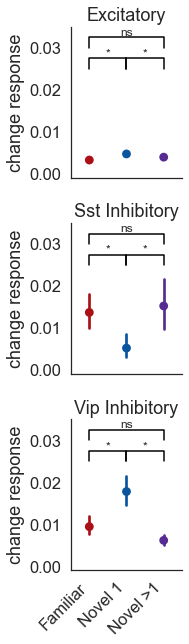

In [28]:
metric = 'change_response'
ylabel = 'change response'
event_type = 'changes'

ppf.plot_metric_distribution_by_experience(change_metrics_table, metric, event_type, stripplot=False, pointplot=True, add_zero_line=False,
                                       ylabel=ylabel, ylims=(-0.001, 0.025), save_dir=save_dir, ax=None)


### change response

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


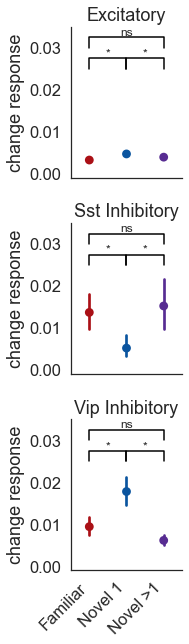

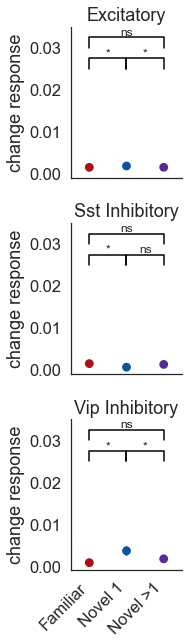

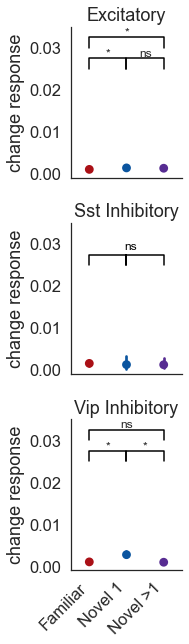

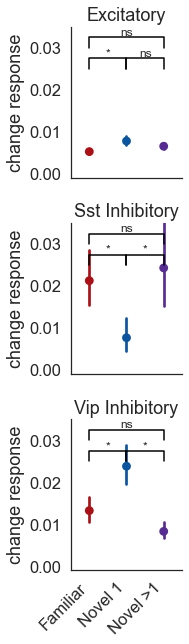

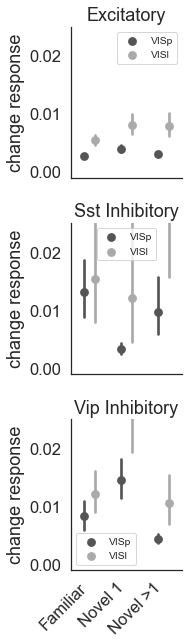

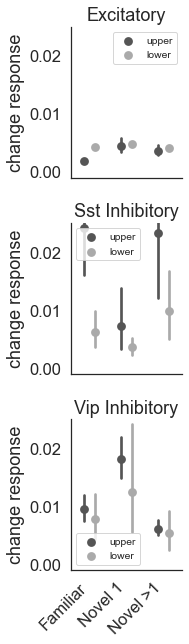

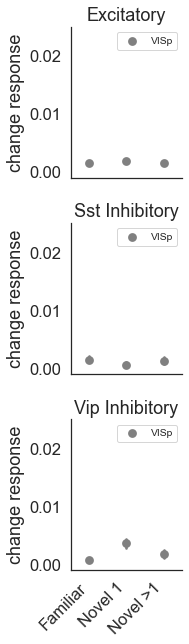

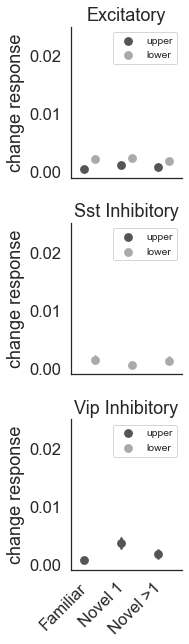

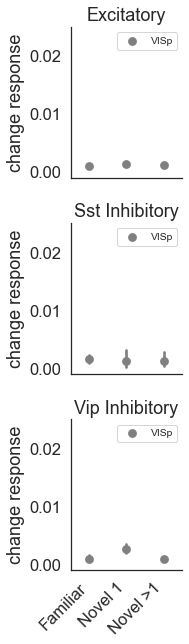

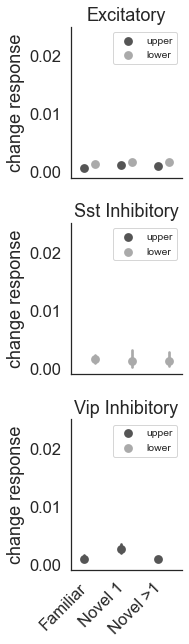

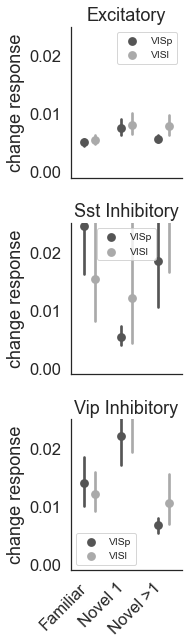

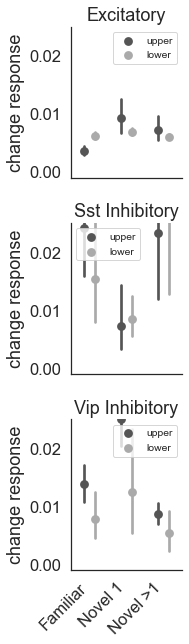

In [29]:
# mean response across experience levels 
metric = 'change_response'
ylabel = 'change response'
event_type = 'changes'

ylims = (-0.001, 0.025)

metrics_table = change_metrics_table.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, add_zero_line=False, save_dir=save_dir)

### pre-change response

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


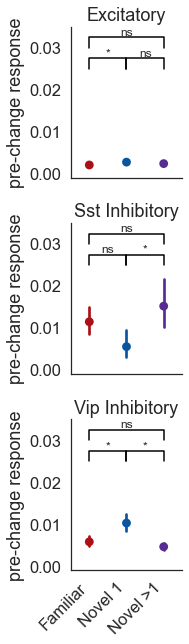

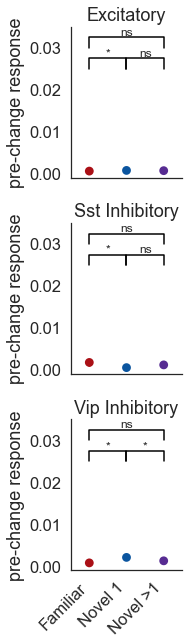

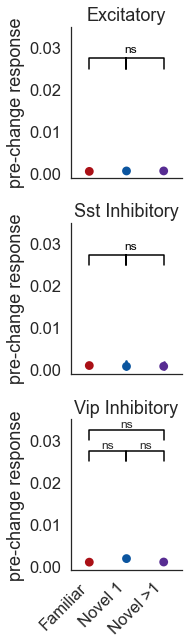

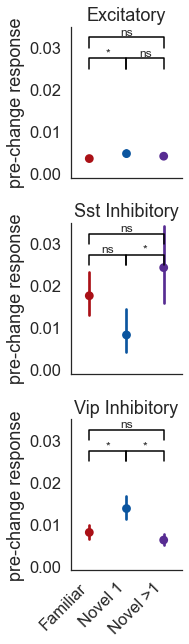

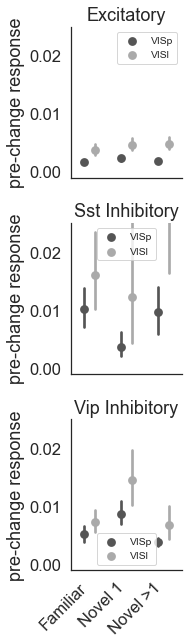

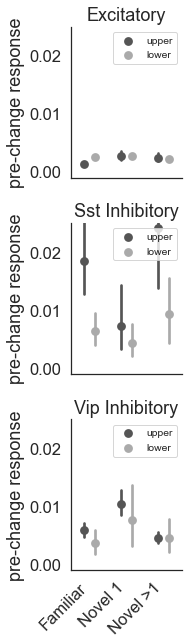

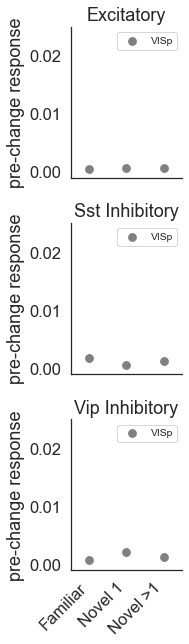

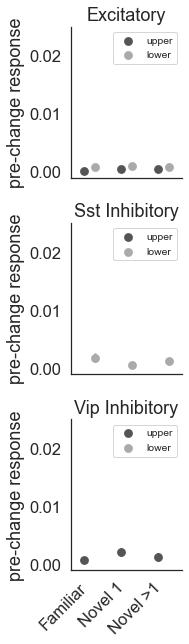

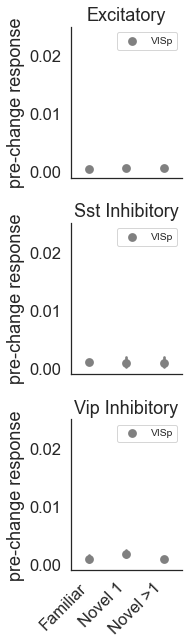

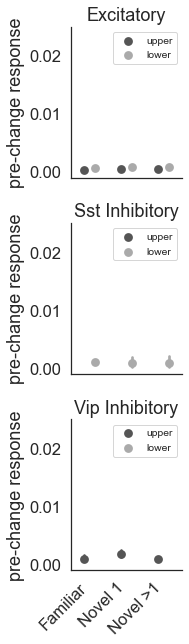

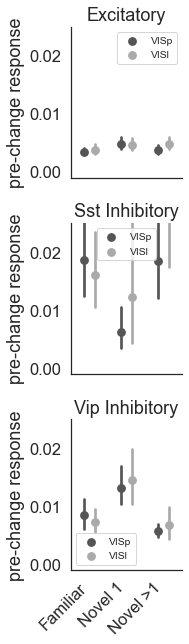

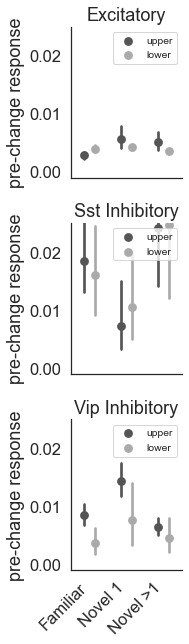

In [30]:
# mean response across experience levels 
metric = 'pre_change_response'
ylabel = 'pre-change response'
event_type = 'pre_change'

ylims = (-0.001, 0.025)

metrics_table = change_metrics_table.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, add_zero_line=False, save_dir=save_dir)

### change modulation index

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


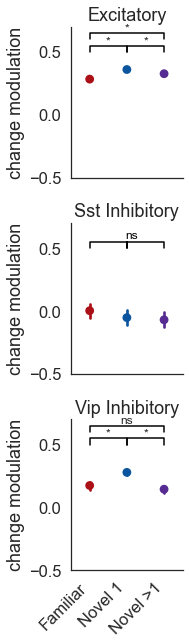

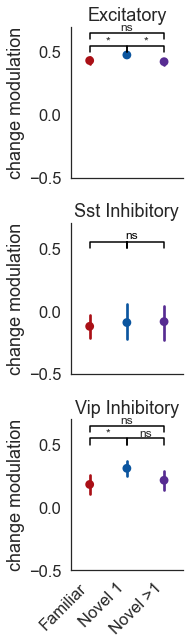

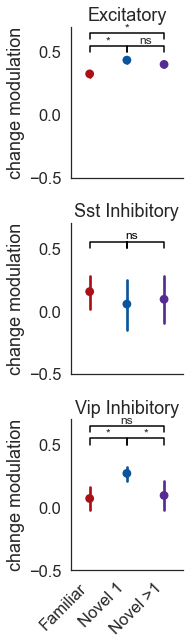

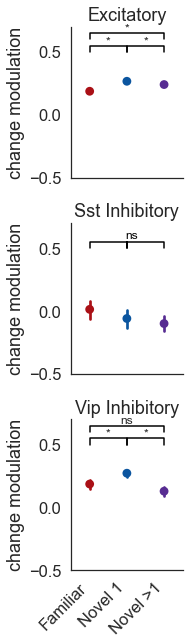

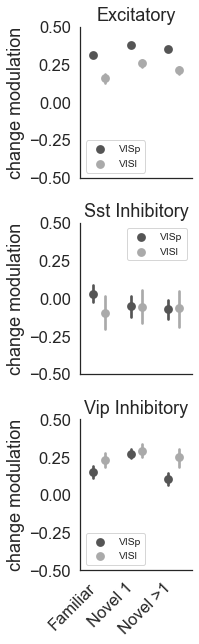

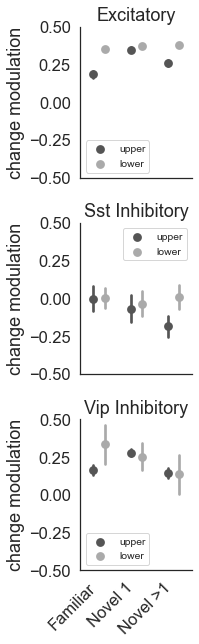

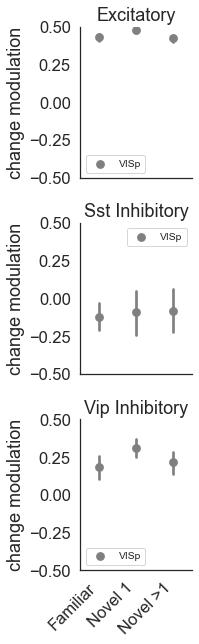

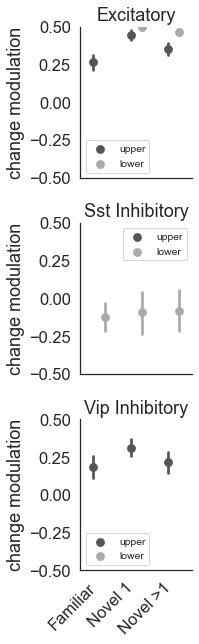

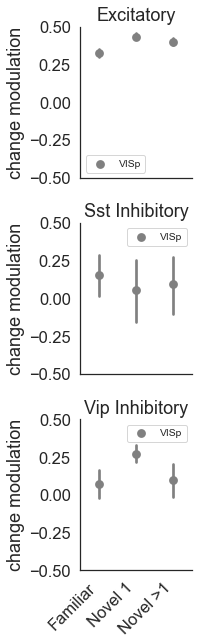

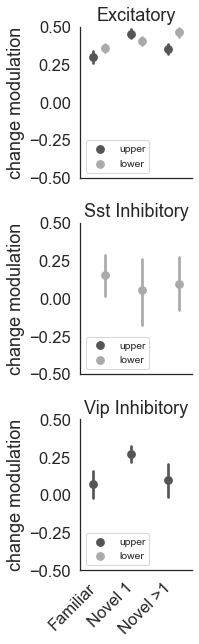

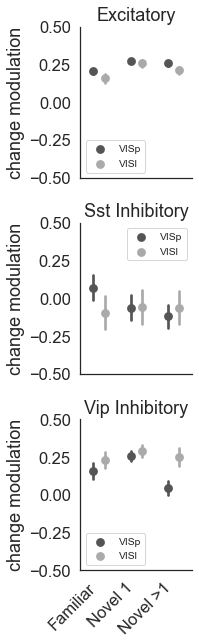

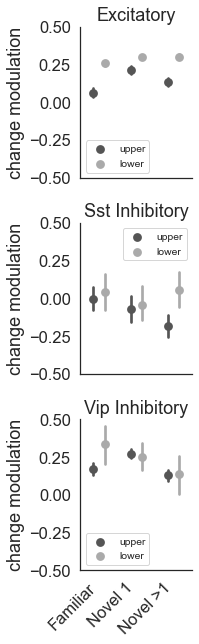

In [31]:
metric = 'change_modulation_index'
ylabel = 'change modulation'
event_type = 'changes'

ylims = (-0.5, 0.5)


metrics_table = change_metrics_table.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, add_zero_line=False, save_dir=save_dir)

### reliability

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


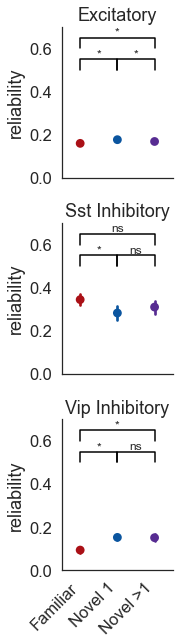

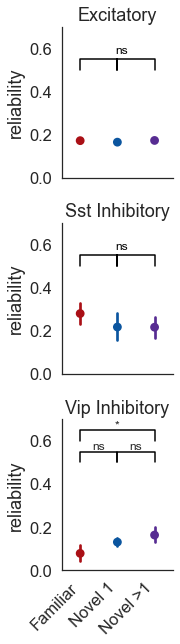

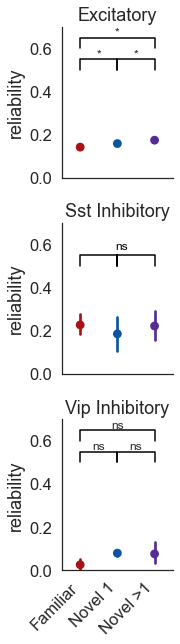

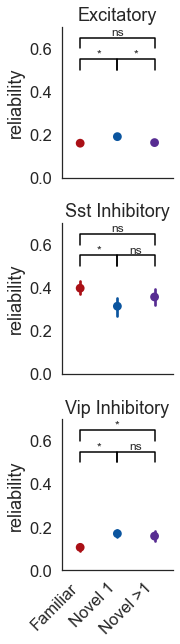

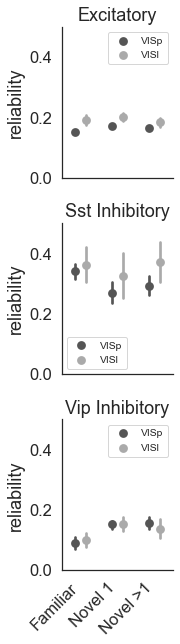

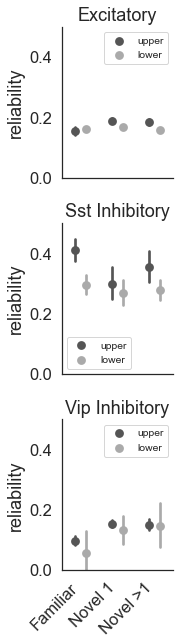

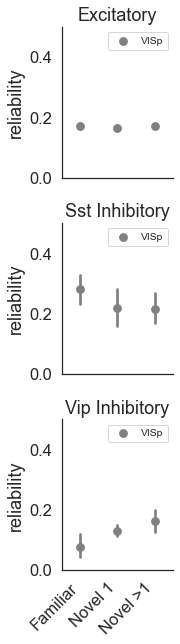

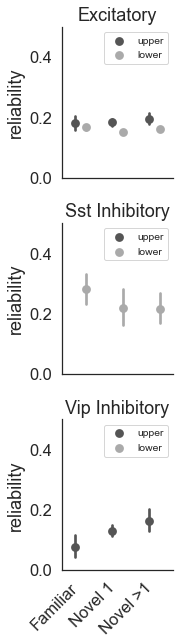

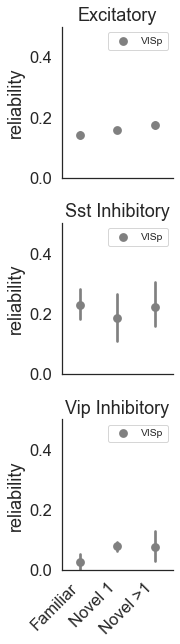

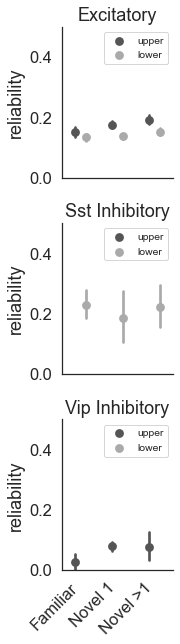

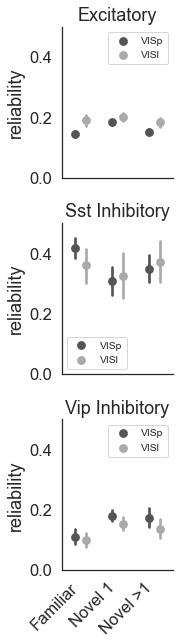

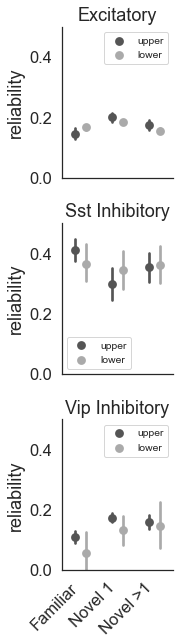

In [32]:
metric = 'reliability'
ylabel = 'reliability'
event_type = 'changes'

ylims = (-0.001, 0.5)

metrics_table = change_metrics_table.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, add_zero_line=False, save_dir=save_dir)

### lifetime sparseness

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


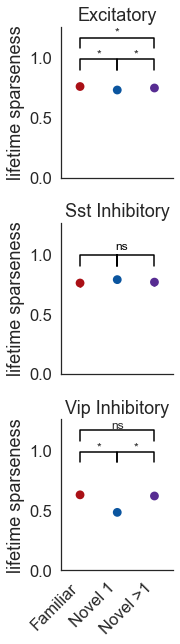

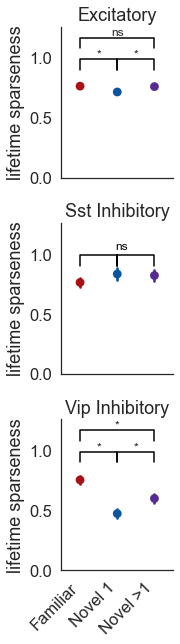

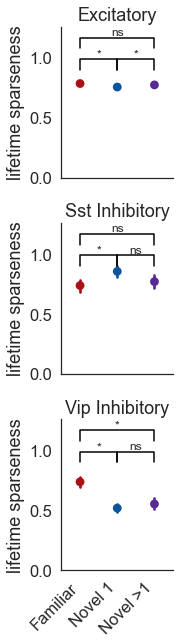

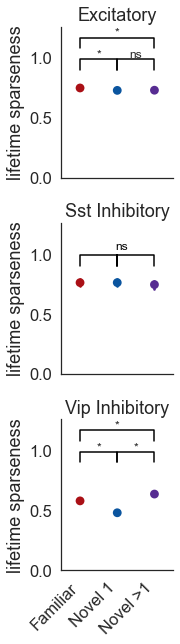

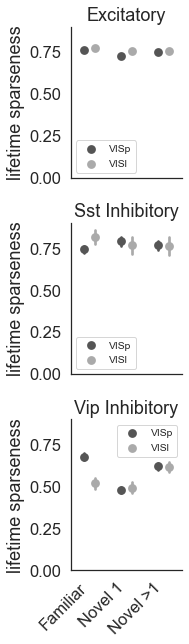

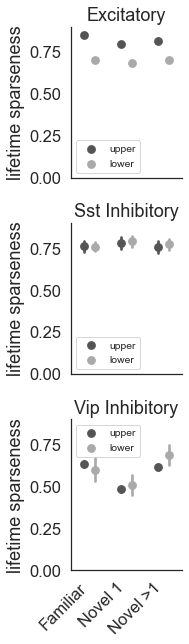

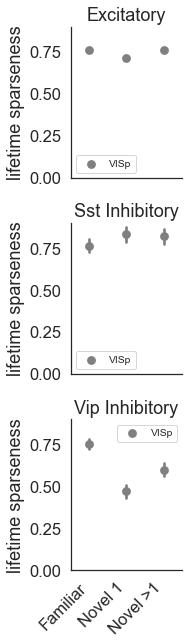

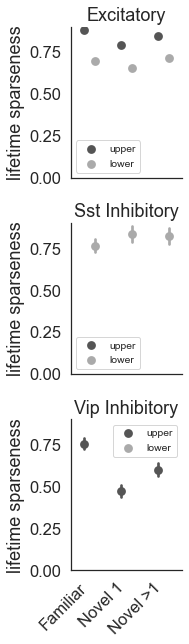

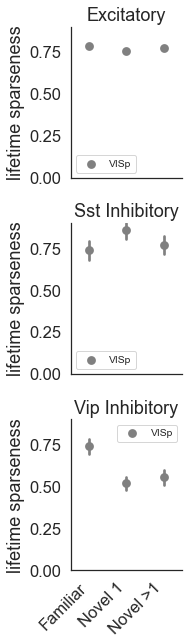

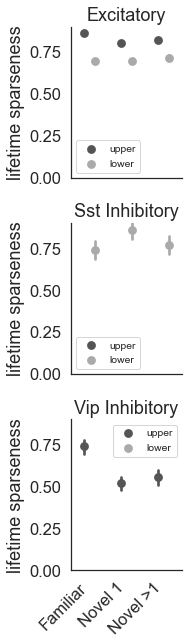

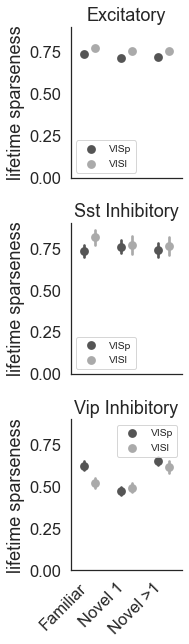

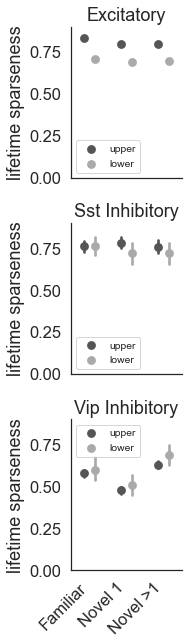

In [33]:
metric = 'lifetime_sparseness'
ylabel = 'lifetime sparseness'
event_type = 'changes'

ylims = (-0.001, 0.9)

metrics_table = change_metrics_table.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, add_zero_line=False, save_dir=save_dir)

### experience modulation of change response

402 experiments in metric_data after merging with cells_table


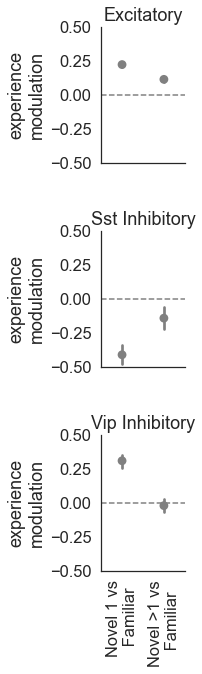

In [34]:
metric = 'change_response'
event_type = 'changes'

metric_data = cm.compute_experience_modulation_index(change_metrics_table, metric, cells_table)
metric_data = metric_data.drop_duplicates(subset='cell_specimen_id')

ppf.plot_experience_modulation_index(metric_data, event_type, save_dir=None)


## omissions 

In [64]:
ophys_experiment_ids = experiments_table.index.values

condition = 'omissions'
stimuli = 'all_images'
session_subset = 'full_session'
    
omission_metrics_table = cm.get_cell_metrics_for_conditions(data_type, condition, stimuli, session_subset, inclusion_criteria)

there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


100%|████████████████████████████████████████████████████████████████████████████████| 402/402 [00:18<00:00, 21.19it/s]


there are 402 experiments in the returned cell_metrics table


### save descriptive stats

In [67]:
conditions = ['cell_type', 'experience_level']
filename = cm.get_metrics_descriptive_stats_filename(conditions, data_type, condition, stimuli, session_subset, inclusion_criteria)
metrics_stats = cm.get_descriptive_stats_for_conditions(omission_metrics_table, condition, conditions, save_dir, filename)

conditions = ['cell_type', 'experience_level', 'targeted_structure']
filename = cm.get_metrics_descriptive_stats_filename(conditions, data_type, condition, stimuli, session_subset, inclusion_criteria)
metrics_stats = cm.get_descriptive_stats_for_conditions(omission_metrics_table, condition, conditions, save_dir, filename)


conditions = ['cell_type', 'experience_level', 'layer']
filename = cm.get_metrics_descriptive_stats_filename(conditions, data_type, condition, stimuli, session_subset, inclusion_criteria)
metrics_stats = cm.get_descriptive_stats_for_conditions(omission_metrics_table, condition, conditions, save_dir, filename)


conditions = ['cell_type', 'experience_level', 'targeted_structure', 'layer']
filename = cm.get_metrics_descriptive_stats_filename(conditions, data_type, condition, stimuli, session_subset, inclusion_criteria)
metrics_stats = cm.get_descriptive_stats_for_conditions(omission_metrics_table, condition, conditions, save_dir, filename)

### mean response

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


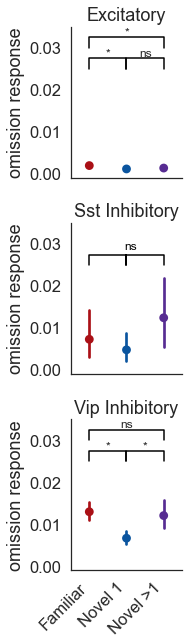

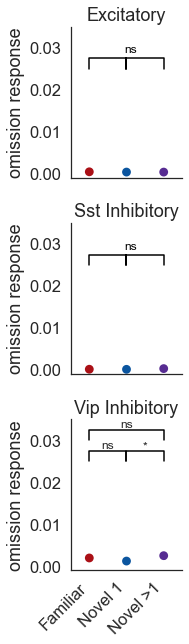

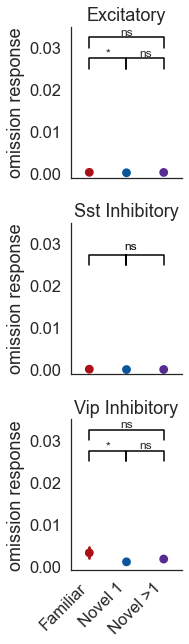

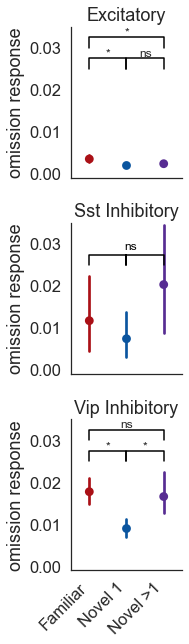

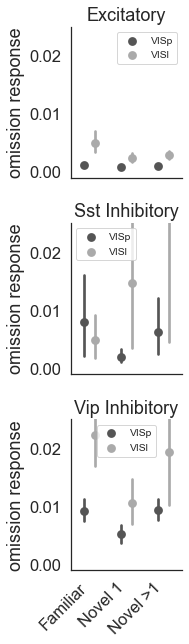

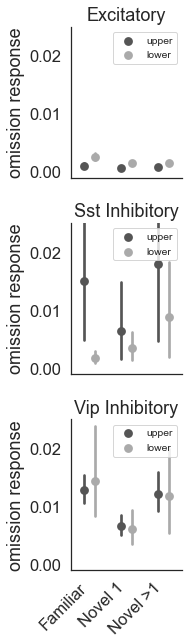

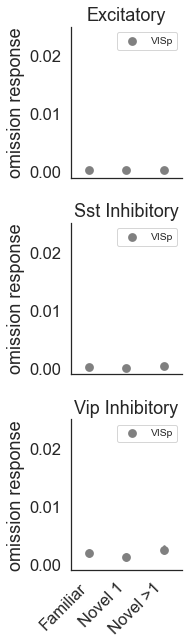

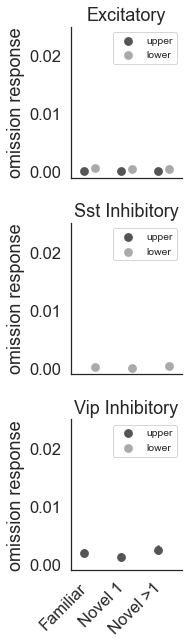

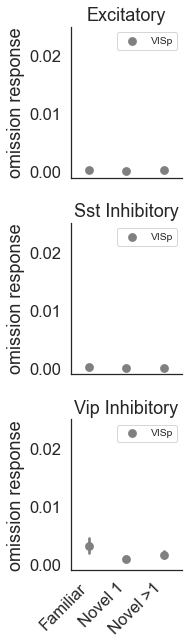

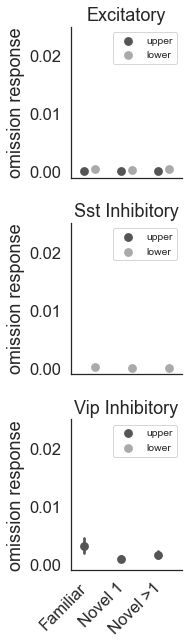

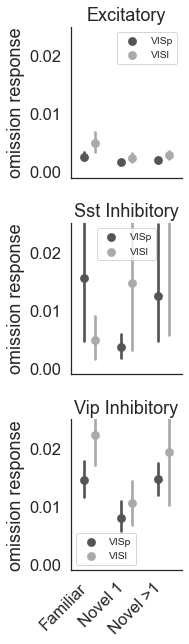

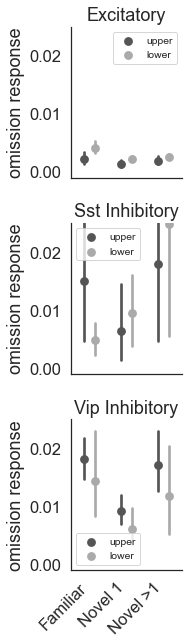

In [68]:
metric = 'omission_response'
ylabel = 'omission response'
event_type = 'omissions'

ylims = (-0.001, 0.025)

metrics_table = omission_metrics_table.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, add_zero_line=False, save_dir=save_dir)

### reliability 

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


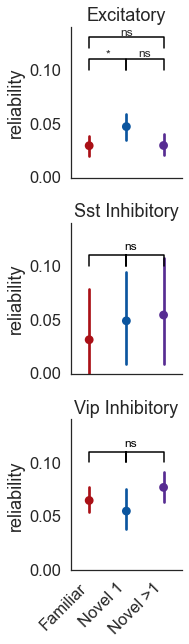

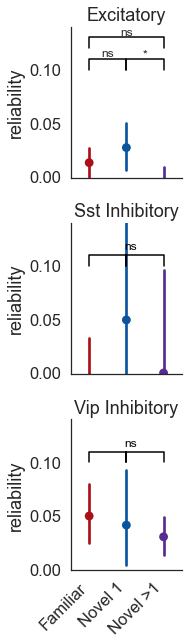

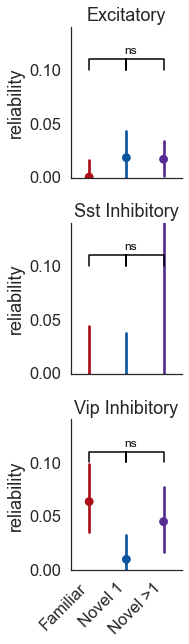

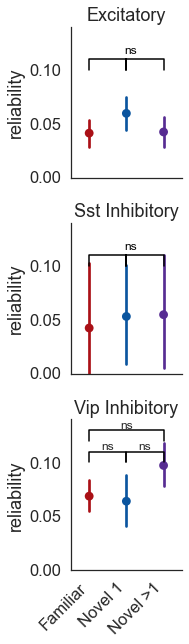

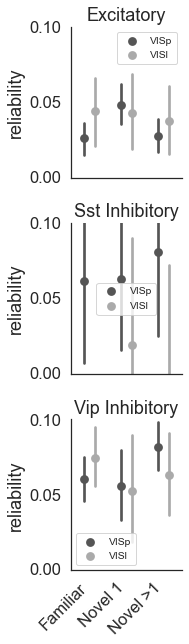

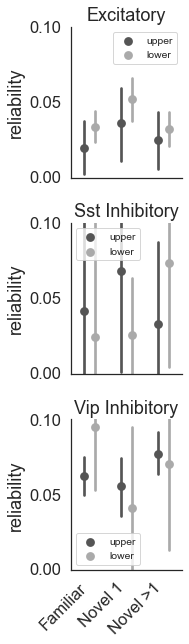

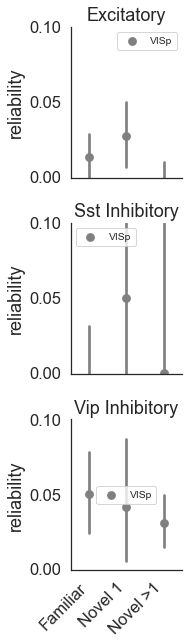

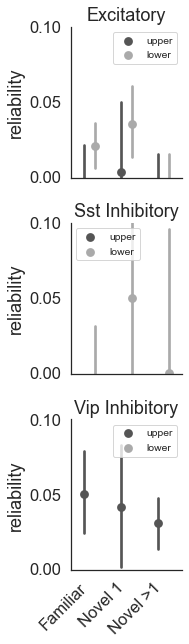

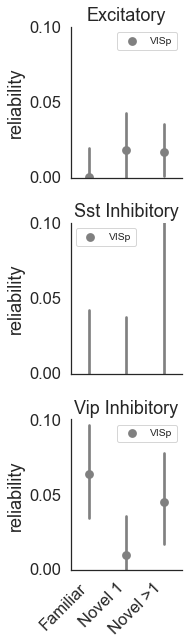

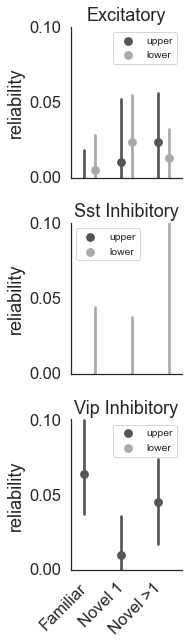

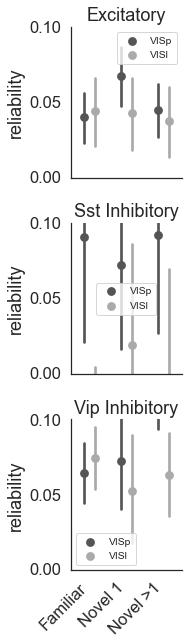

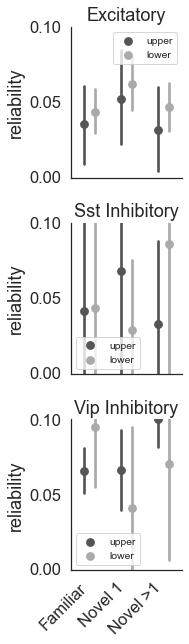

In [69]:
metric = 'reliability'
ylabel = 'reliability'

ylims = (-0.001, 0.1)

metrics_table = omission_metrics_table.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, add_zero_line=False, save_dir=save_dir)

### running modulation

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


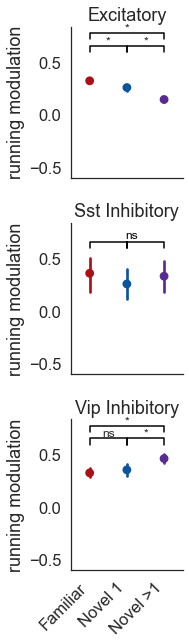

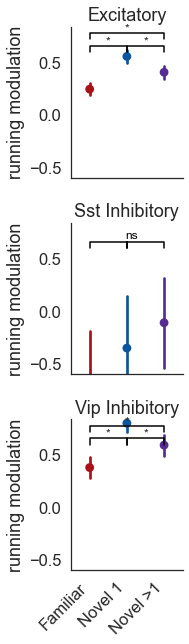

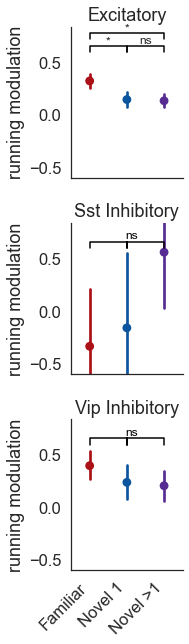

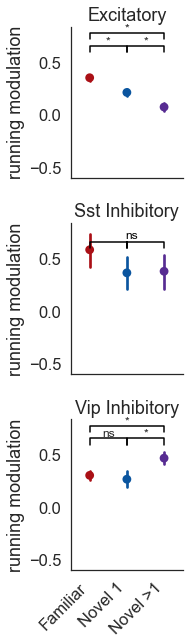

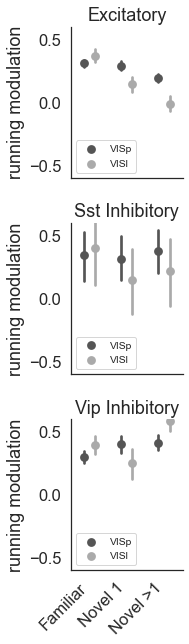

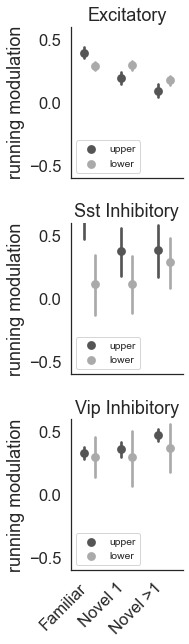

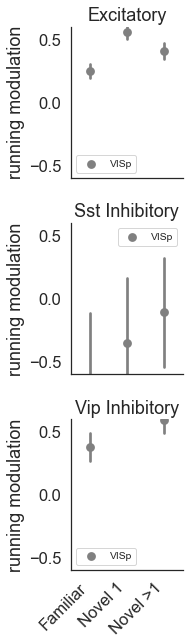

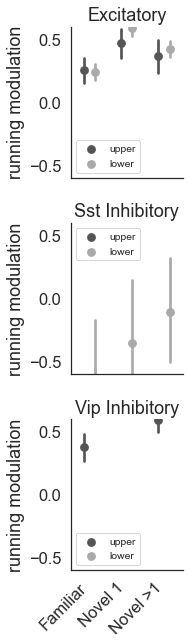

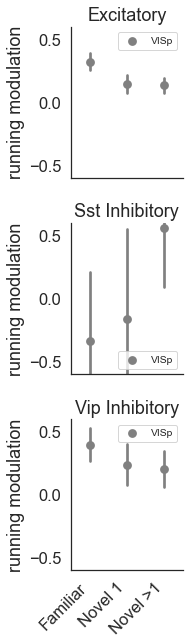

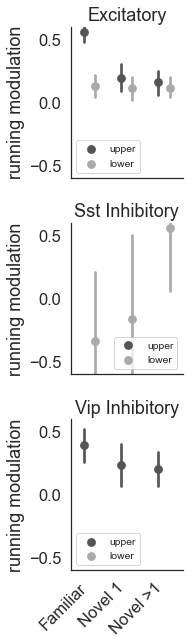

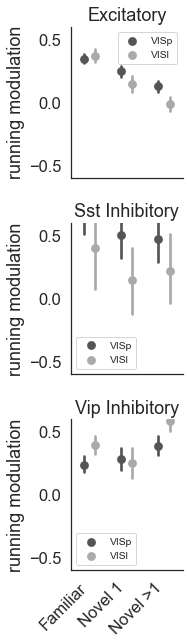

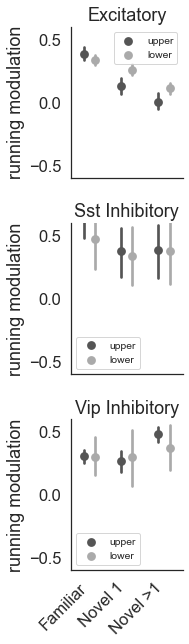

In [70]:
metric = 'running_modulation_index'
ylabel = 'running modulation'
event_type = 'omissions'

ylims = (-0.6, 0.6)

metrics_table = omission_metrics_table.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, add_zero_line=False, save_dir=save_dir)

### omission modulation by experience

402 experiments in metric_data after merging with cells_table


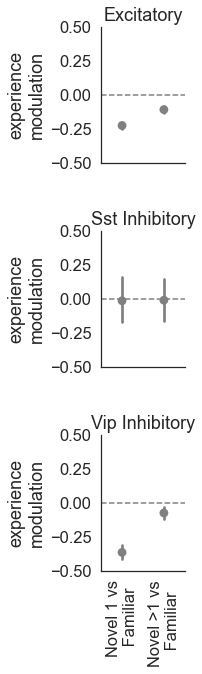

In [71]:
metric = 'omission_response'
event_type = 'omissions'

metric_data = cm.compute_experience_modulation_index(omission_metrics_table, metric, cells_table)
metric_data = metric_data.drop_duplicates(subset='cell_specimen_id')

ppf.plot_experience_modulation_index(metric_data, event_type, save_dir=None)


## Behavior

### running speed

### changes

In [37]:
# params for stim response df creation
event_type = 'all'
data_type = 'running_speed'

interpolate = False
output_sampling_rate = None

# params for mean response df creation
conditions = ['ophys_experiment_id', 'is_change']


running_speed_suffix = '_'+utils.get_conditions_string(data_type, conditions)+'_'+inclusion_criteria

running_speed_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria, 
                                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate, 
                                                         epoch_duration_mins=None)

running_speed_mdf = running_speed_mdf[running_speed_mdf.is_change==True]

there are 1885 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limiting to platform experiments
there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


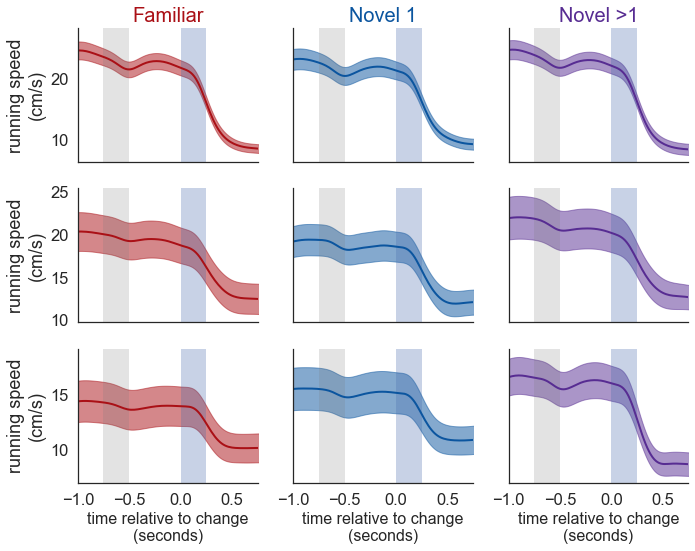

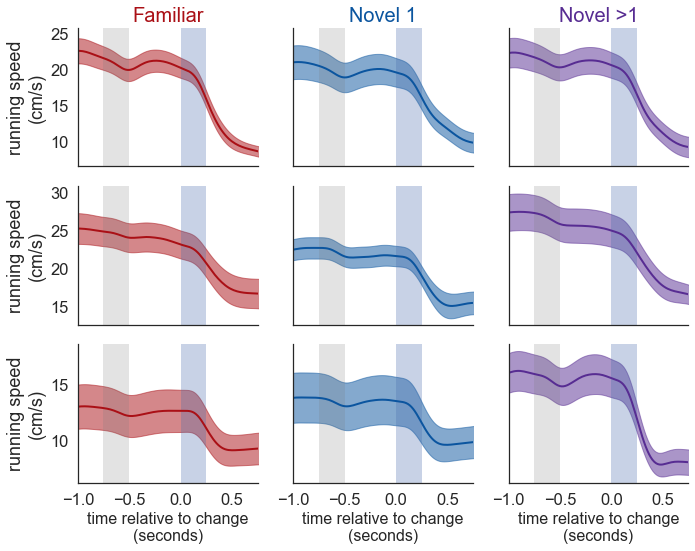

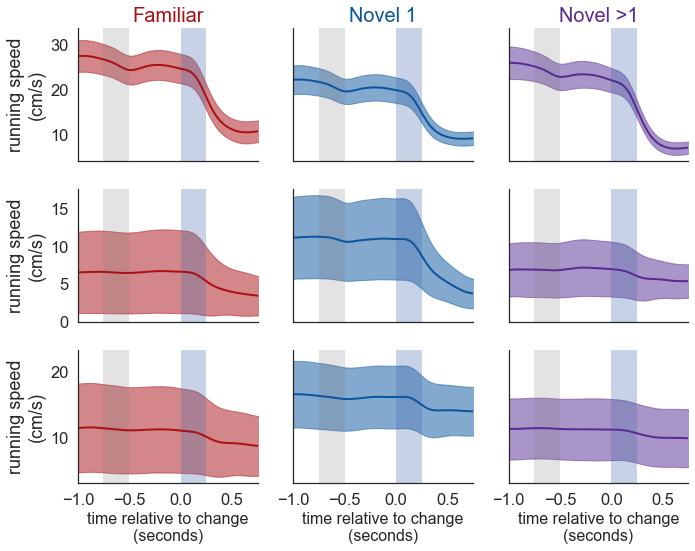

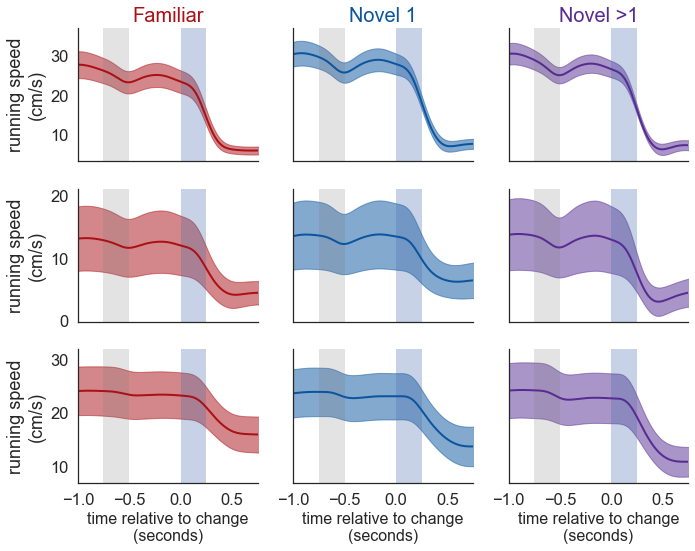

In [38]:
df = running_speed_mdf.copy()

ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to change\n(seconds)', interval_sec=0.5,
                                                              ylabel='running speed\n(cm/s)',
                                                              data_type=data_type, event_type='changes', suffix=running_speed_suffix,
                                                              save_dir=save_dir, folder=folder, ax=None)

for project_code in running_speed_mdf.project_code.unique():
    
    df = running_speed_mdf[running_speed_mdf.project_code==project_code]

    ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to change\n(seconds)', interval_sec=0.5,
                                                                  ylabel='running speed\n(cm/s)',
                                                                  data_type=data_type, event_type='changes',
                                                                  suffix=running_speed_suffix+'_'+project_code,
                                                                  save_dir=save_dir, folder=folder, ax=None)

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


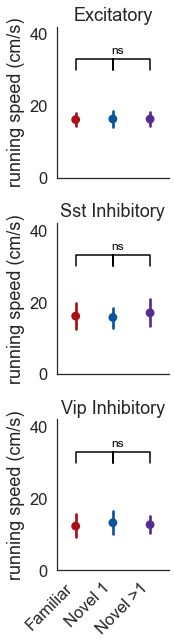

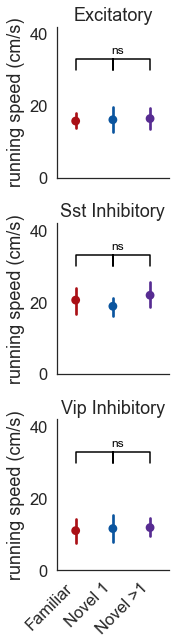

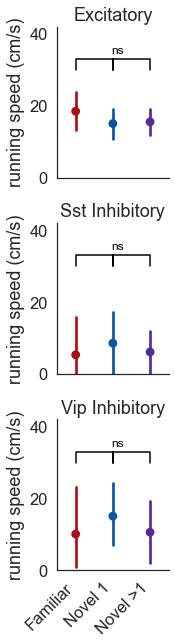

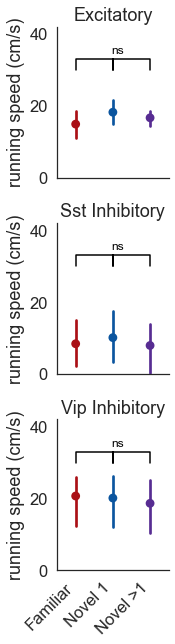

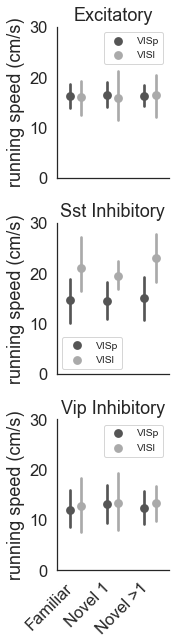

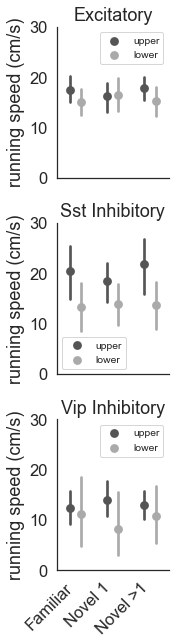

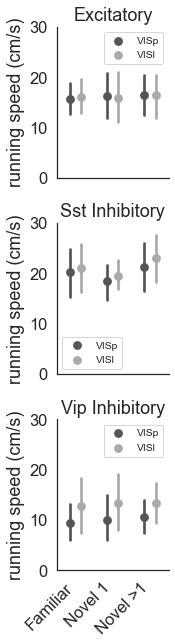

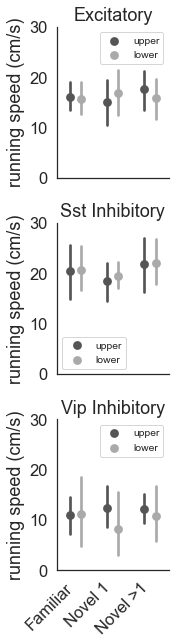

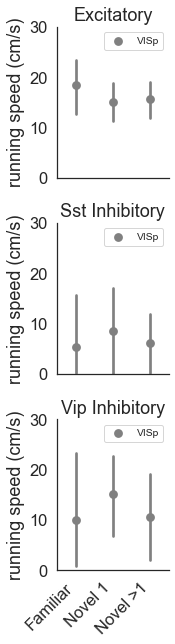

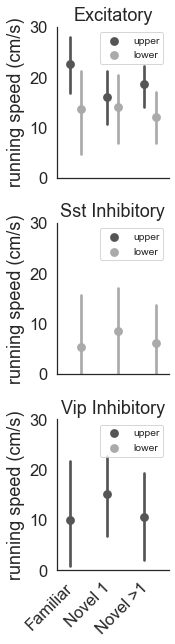

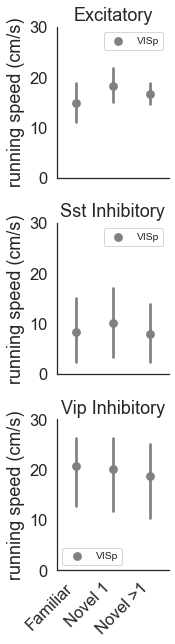

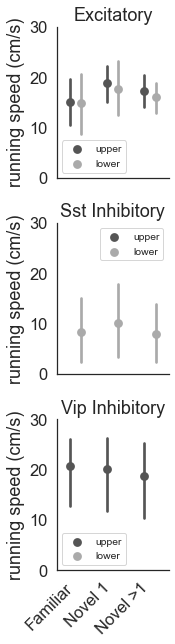

In [39]:
# mean response across experience levels 
metric = 'mean_response'
ylabel = 'running speed (cm/s)'
event_type = 'running_speed_changes'

ylims = (0, 30)

metrics_table = running_speed_mdf.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, 
                                            add_zero_line=False, save_dir=save_dir)

### omissions

In [40]:
# params for stim response df creation
event_type = 'all'
data_type = 'running_speed'

interpolate = False
output_sampling_rate = None

# params for mean response df creation
conditions = ['ophys_experiment_id', 'omitted']


running_speed_suffix = '_'+utils.get_conditions_string(data_type, conditions)+'_'+inclusion_criteria

running_speed_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria, 
                                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate, 
                                                         epoch_duration_mins=None)

running_speed_mdf = running_speed_mdf[running_speed_mdf.omitted==True]

there are 1885 experiments in the full multi_session_df
there are 402 experiments in the multi_session_df after limiting to platform experiments
there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


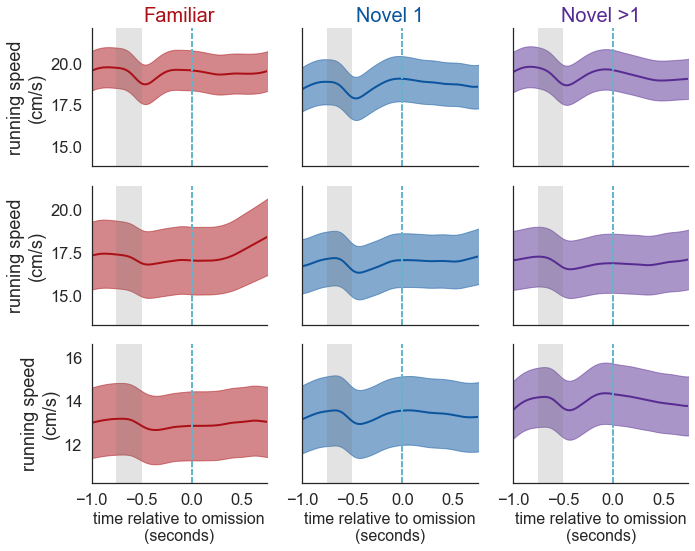

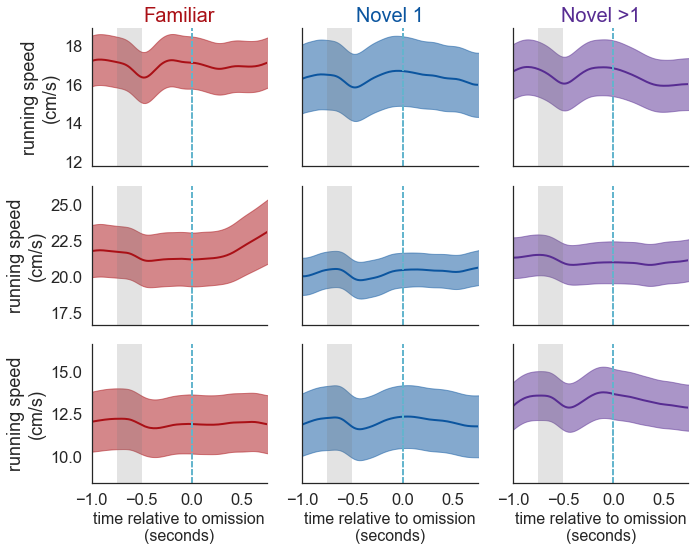

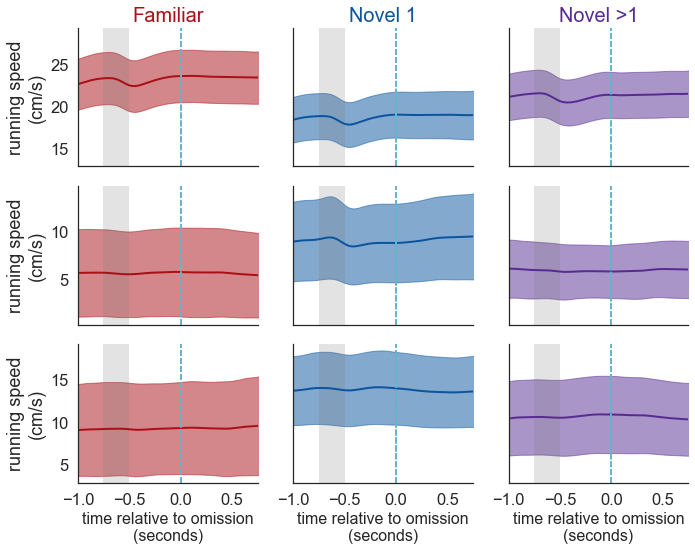

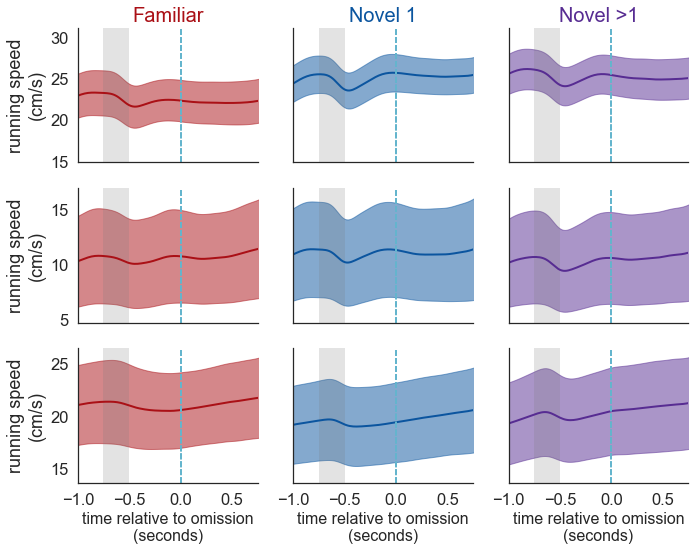

In [41]:
df = running_speed_mdf.copy()

ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to omission\n(seconds)', interval_sec=0.5,
                                                              ylabel='running speed\n(cm/s)',
                                                              data_type=data_type, event_type='omissions', suffix=running_speed_suffix,
                                                              save_dir=save_dir, folder=folder, ax=None)

for project_code in running_speed_mdf.project_code.unique():
    
    df = running_speed_mdf[running_speed_mdf.project_code==project_code]

    ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to omission\n(seconds)', interval_sec=0.5,
                                                                  ylabel='running speed\n(cm/s)',
                                                                  data_type=data_type, event_type='omissions',
                                                                  suffix=running_speed_suffix+'_'+project_code,
                                                                  save_dir=save_dir, folder=folder, ax=None)

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


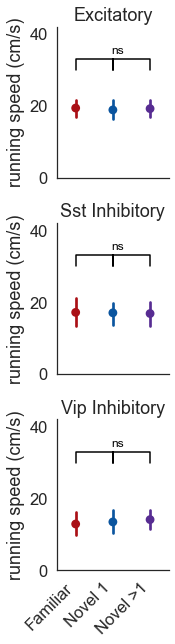

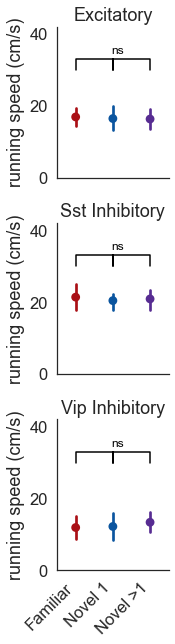

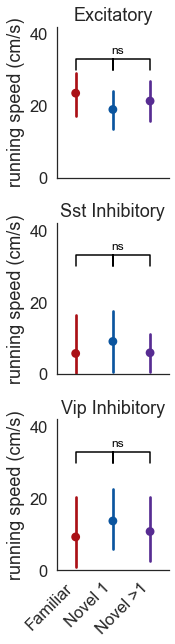

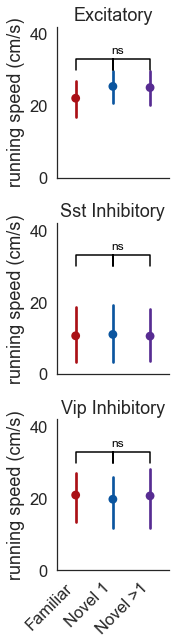

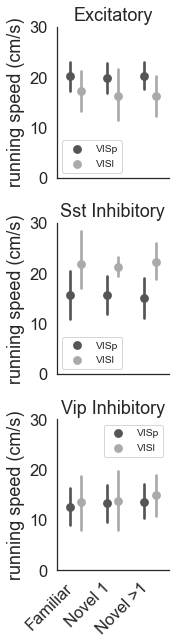

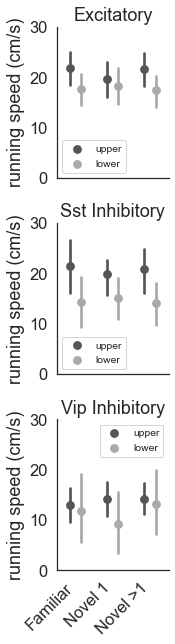

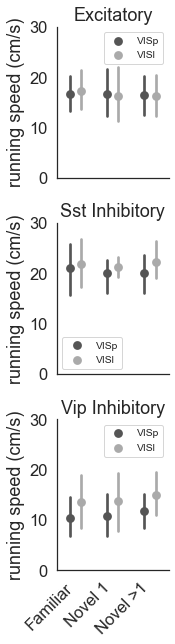

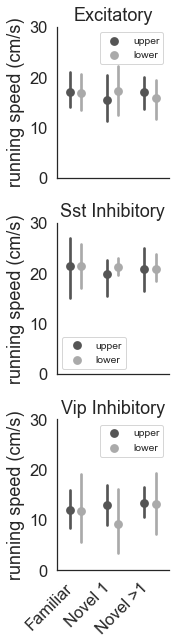

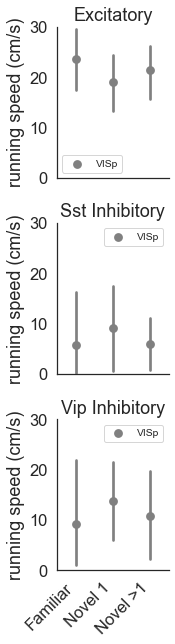

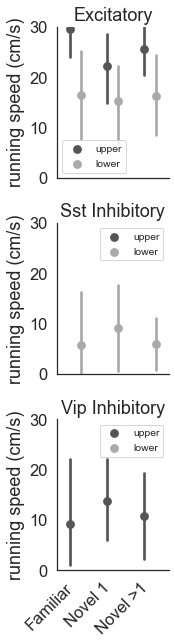

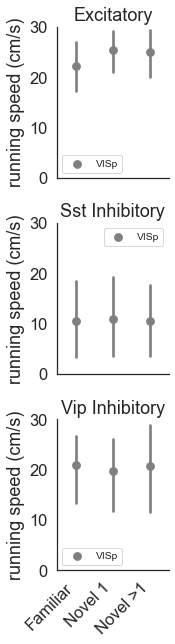

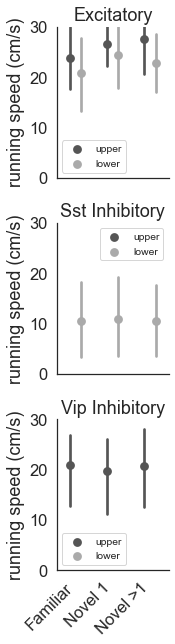

In [42]:
# mean response across experience levels 
metric = 'mean_response'
ylabel = 'running speed (cm/s)'
event_type = 'running_speed_omissions'

ylims = (0, 30)

metrics_table = running_speed_mdf.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, 
                                            add_zero_line=False, save_dir=save_dir)

### pupil width

In [43]:
# params for stim response df creation
event_type = 'all'
data_type = 'pupil_width'

interpolate = True
output_sampling_rate = 30

# params for mean response df creation
conditions = ['ophys_experiment_id', 'is_change']


pupil_suffix = '_'+utils.get_conditions_string(data_type, conditions)+'_'+inclusion_criteria

pupil_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria, 
                                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate, 
                                                         epoch_duration_mins=None)

pupil_mdf = pupil_mdf[pupil_mdf.is_change==True]

there are 1245 experiments in the full multi_session_df
there are 401 experiments in the multi_session_df after limiting to platform experiments
there are 401 experiments after filtering for inclusion criteria -  platform_experiment_table


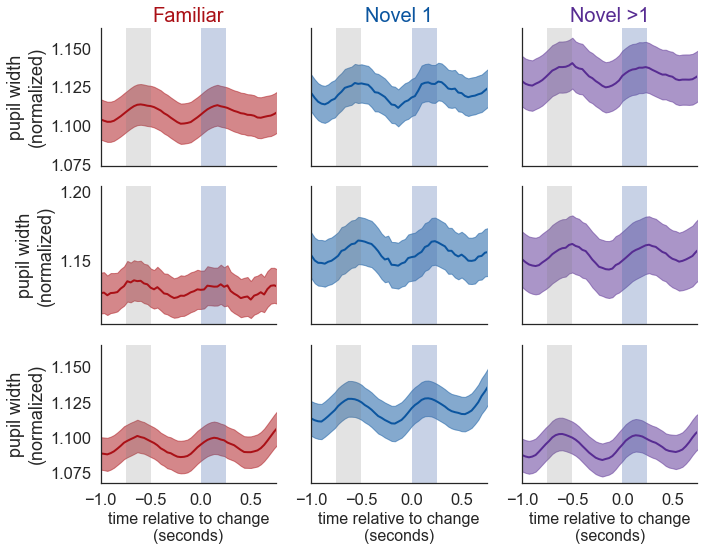

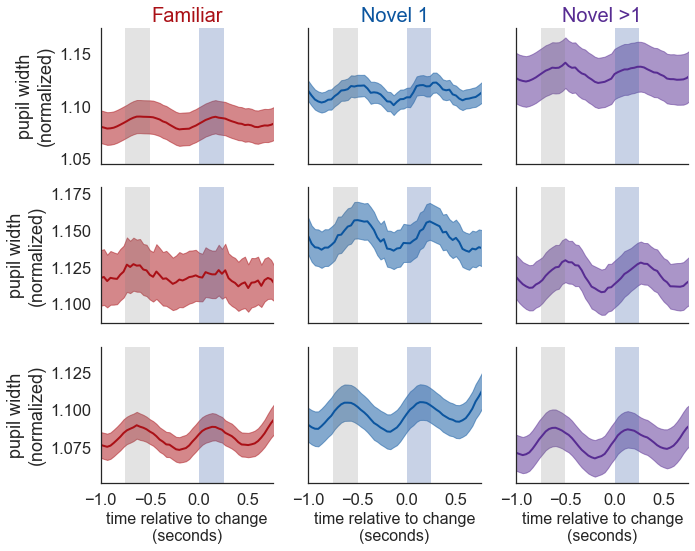

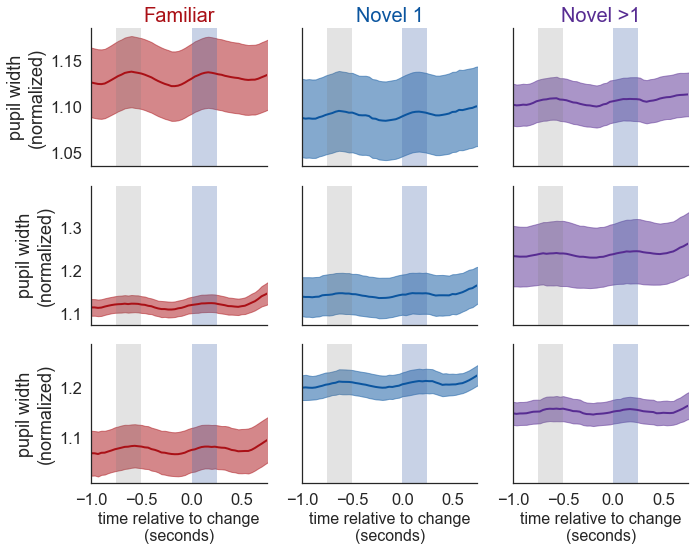

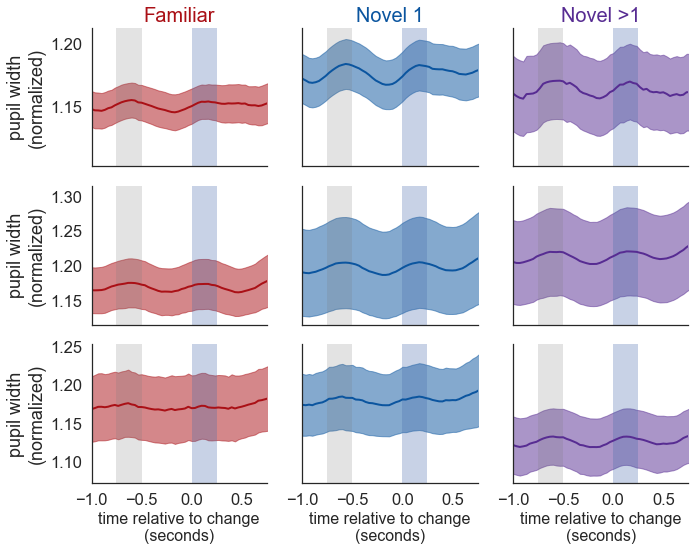

In [44]:
df = pupil_mdf.copy()

ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to change\n(seconds)', interval_sec=0.5,
                                                              ylabel='pupil width\n(normalized)',
                                                              data_type=data_type, event_type='changes', suffix=pupil_suffix,
                                                              save_dir=save_dir, folder=folder, ax=None)

for project_code in pupil_mdf.project_code.unique():
    
    df = pupil_mdf[pupil_mdf.project_code==project_code]

    ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to change\n(seconds)', interval_sec=0.5,
                                                                  ylabel='pupil width\n(normalized)',
                                                                  data_type=data_type, event_type='changes',
                                                                  suffix=pupil_suffix+'_'+project_code,
                                                                  save_dir=save_dir, folder=folder, ax=None)

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


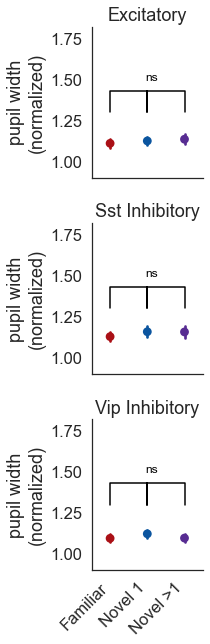

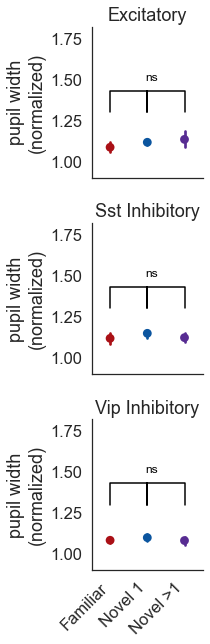

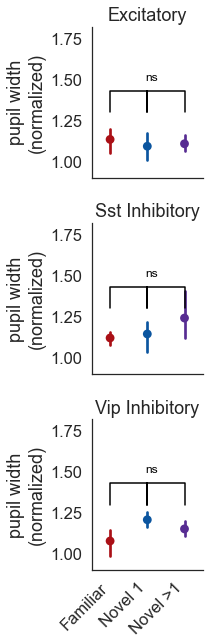

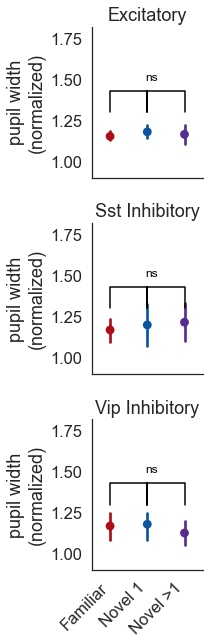

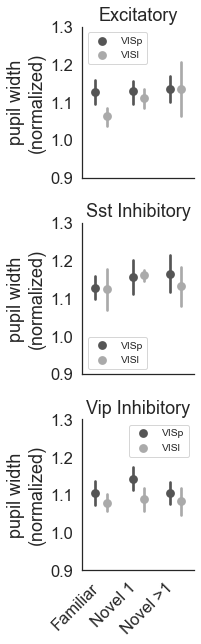

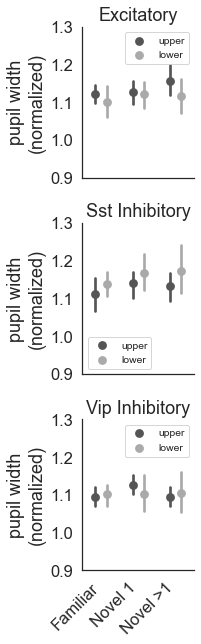

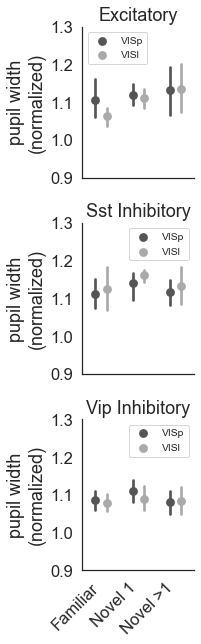

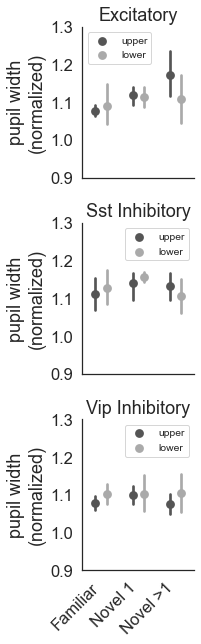

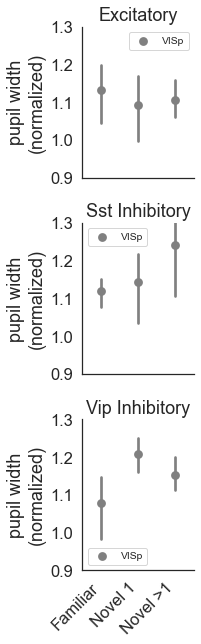

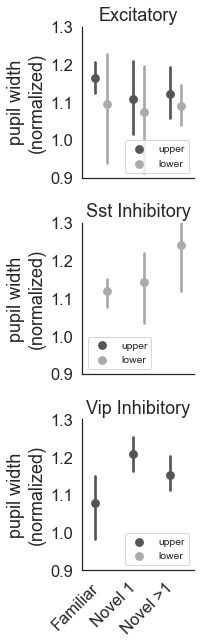

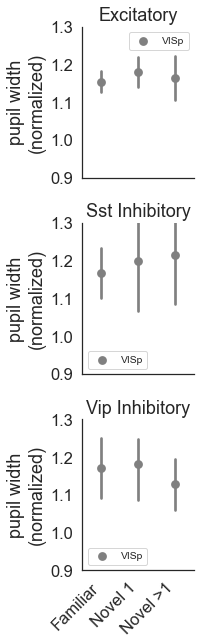

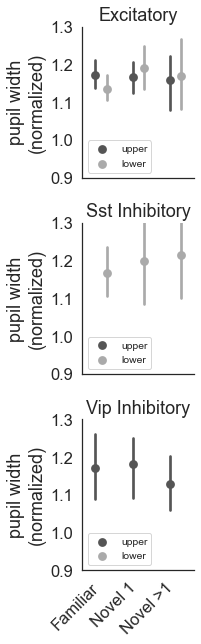

In [45]:
# mean response across experience levels 
metric = 'mean_response'
ylabel = 'pupil width\n(normalized)'
event_type = 'pupil_width_changes'

ylims = (0.9, 1.3)

metrics_table = pupil_mdf.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, 
                                            add_zero_line=False, save_dir=save_dir)

### omissions

In [46]:
# params for stim response df creation
event_type = 'all'
data_type = 'pupil_width'

interpolate = True
output_sampling_rate = 30

# params for mean response df creation
conditions = ['ophys_experiment_id', 'omitted']


pupil_suffix = '_'+utils.get_conditions_string(data_type, conditions)+'_'+inclusion_criteria

pupil_mdf = loading.get_multi_session_df_for_conditions(data_type, event_type, conditions, inclusion_criteria, 
                                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate, 
                                                         epoch_duration_mins=None)

pupil_mdf = pupil_mdf[pupil_mdf.omitted==True]

there are 1245 experiments in the full multi_session_df
there are 401 experiments in the multi_session_df after limiting to platform experiments
there are 401 experiments after filtering for inclusion criteria -  platform_experiment_table


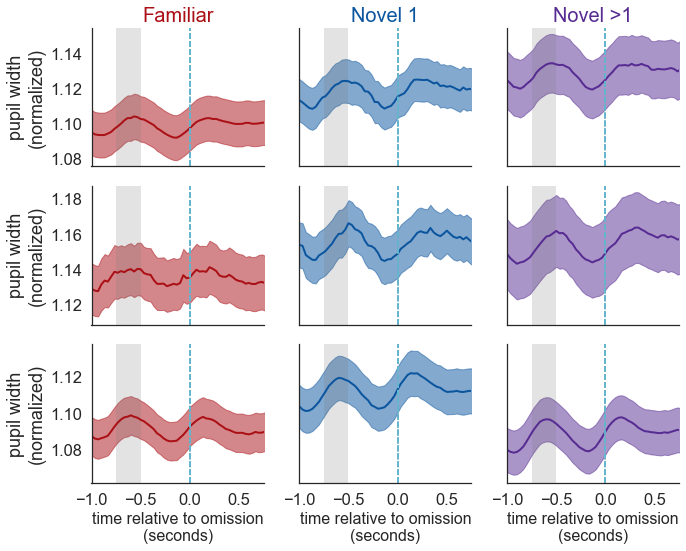

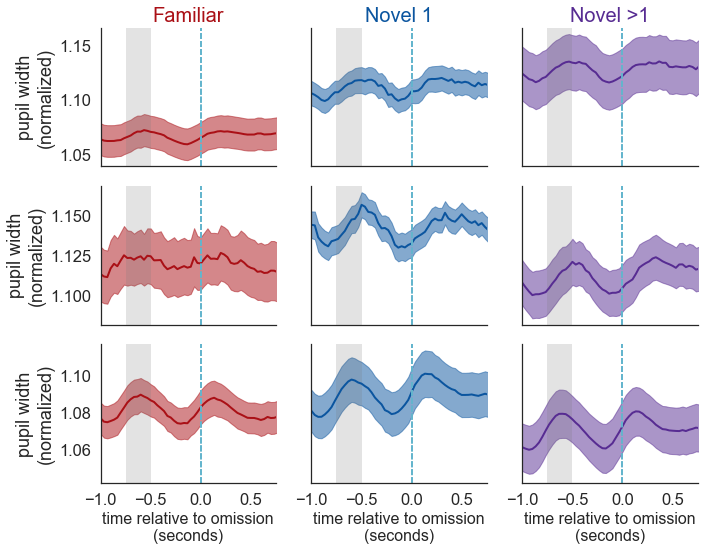

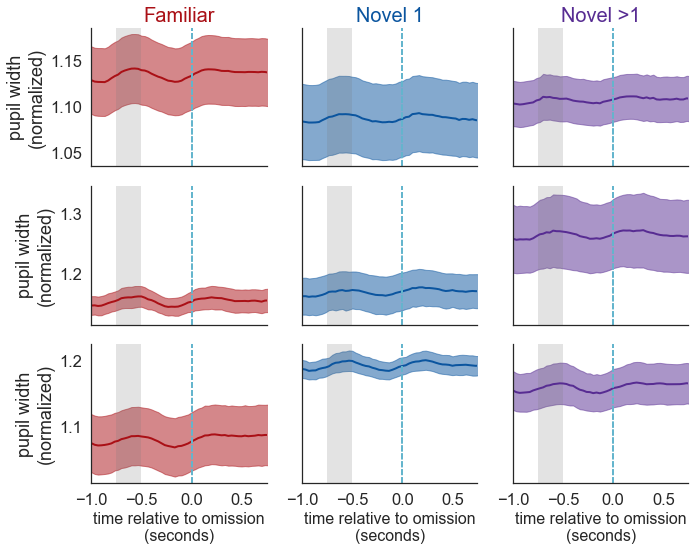

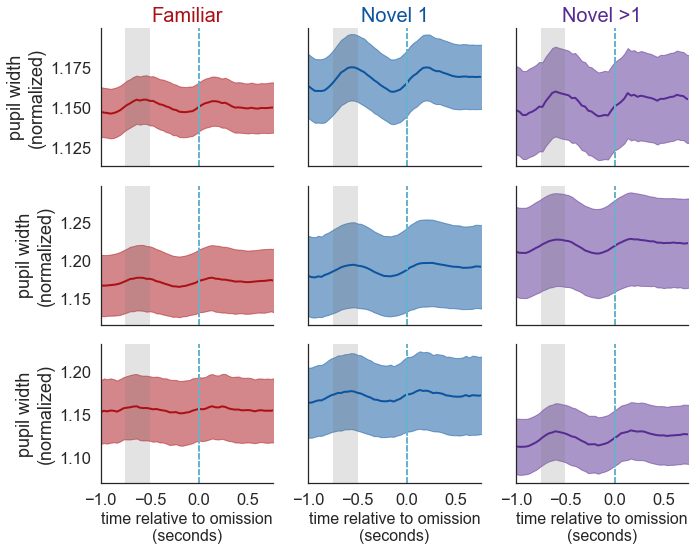

In [47]:
df = pupil_mdf.copy()

ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to omission\n(seconds)', interval_sec=0.5,
                                                              ylabel='pupil width\n(normalized)',
                                                              data_type=data_type, event_type='omissions', suffix=pupil_suffix,
                                                              save_dir=save_dir, folder=folder, ax=None)

for project_code in pupil_mdf.project_code.unique():
    
    df = pupil_mdf[pupil_mdf.project_code==project_code]

    ppf.plot_population_averages_for_cell_types_across_experience(df, xlim_seconds=[-1, 0.75], xlabel='time relative to omission\n(seconds)', interval_sec=0.5,
                                                                  ylabel='pupil width\n(normalized)',
                                                                  data_type=data_type, event_type='omissions',
                                                                  suffix=pupil_suffix+'_'+project_code,
                                                                  save_dir=save_dir, folder=folder, ax=None)

saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats
saving_stats


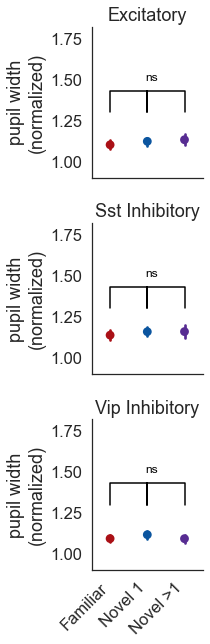

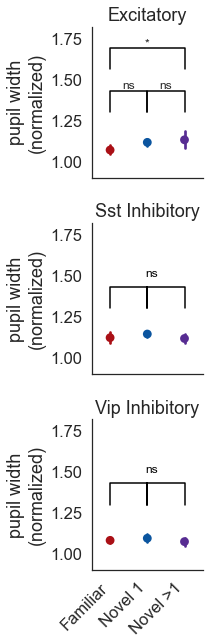

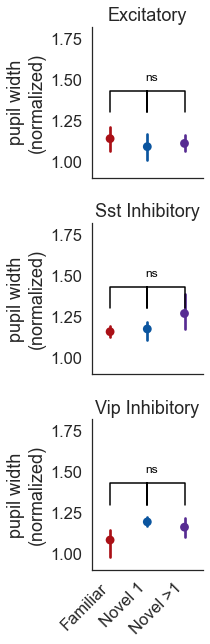

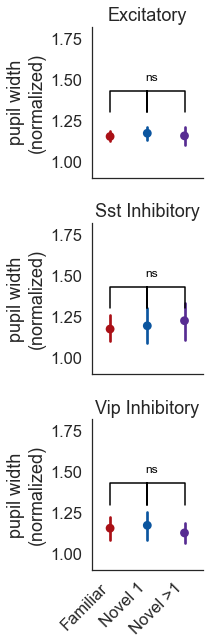

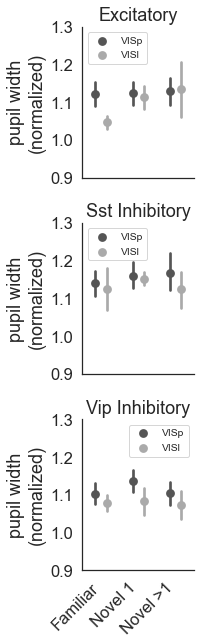

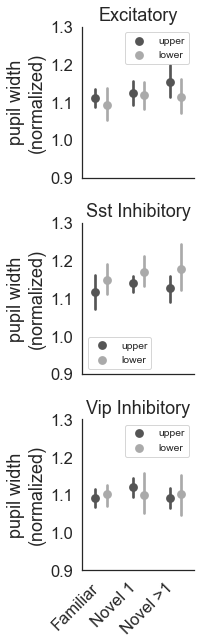

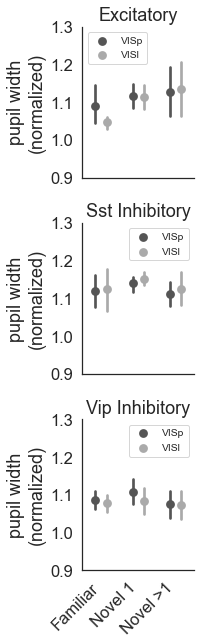

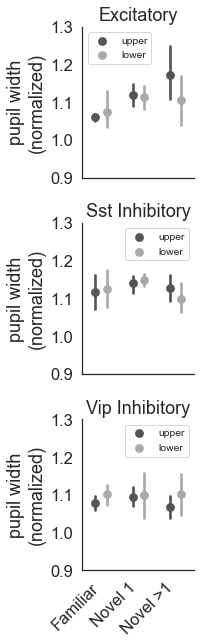

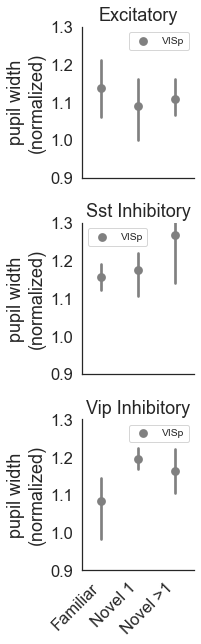

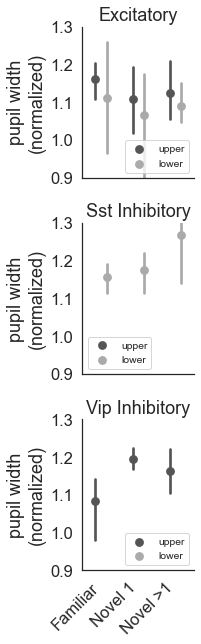

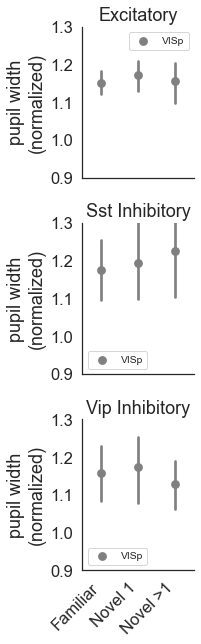

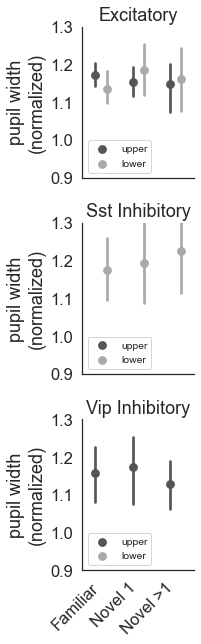

In [48]:
# mean response across experience levels 
metric = 'mean_response'
ylabel = 'pupil width\n(normalized)'
event_type = 'pupil_width_omissions'

ylims = (0.9, 1.3)

metrics_table = pupil_mdf.copy()

ppf.plot_metric_distribution_all_conditions(metrics_table, metric, event_type, ylabel=ylabel, ylims=ylims, 
                                            add_zero_line=False, save_dir=save_dir)